In [ ]:
!wget https://github.com/yildirimozal/Kidney_stone_detection/archive/refs/heads/main.zip

--2023-11-11 18:38:16--  https://github.com/yildirimozal/Kidney_stone_detection/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/yildirimozal/Kidney_stone_detection/zip/refs/heads/main [following]
--2023-11-11 18:38:16--  https://codeload.github.com/yildirimozal/Kidney_stone_detection/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [  <=>               ] 681.91M  16.0MB/s    in 43s     

2023-11-11 18:39:00 (15.8 MB/s) - ‘main.zip’ saved [715038574]



In [ ]:
!unzip main.zip

Archive:  main.zip
2f4b2c2bb854a034cf788f87624d682ee5498abd
   creating: Kidney_stone_detection-main/
   creating: Kidney_stone_detection-main/Dataset/
   creating: Kidney_stone_detection-main/Dataset/Test/
   creating: Kidney_stone_detection-main/Dataset/Test/Kidney_stone/
 extracting: Kidney_stone_detection-main/Dataset/Test/Kidney_stone/1.3.46.670589.33.1.63706830475347975400001.4676991400730475635.png  
 extracting: Kidney_stone_detection-main/Dataset/Test/Kidney_stone/1.3.46.670589.33.1.63713381201930036800001.4827992095518766847.png  
 extracting: Kidney_stone_detection-main/Dataset/Test/Kidney_stone/1.3.46.670589.33.1.63713381202000040800001.4767376869074405978.png  
 extracting: Kidney_stone_detection-main/Dataset/Test/Kidney_stone/1.3.46.670589.33.1.63713381202196052000001.5640598999486184919.png  
 extracting: Kidney_stone_detection-main/Dataset/Test/Kidney_stone/1.3.46.670589.33.1.63713381202237054300001.5283382789026321582.png  
 extracting: Kidney_stone_detection-main/Data

In [ ]:
import cv2
import os

parent_dir = '/content/Kidney_stone_detection-main/Dataset'

output_dir = '/content/resized_images/'

target_size = (800, 1000)

os.makedirs(output_dir, exist_ok=True)

def process_directory(directory_path):
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)

        if os.path.isdir(item_path):
            process_directory(item_path)
        elif item.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                image = cv2.imread(item_path)

                if image is None:
                    print(f"Error: Failed to load {item}")
                    continue

                resized_image = cv2.resize(image, target_size)

                relative_path = os.path.relpath(item_path, parent_dir)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                cv2.imwrite(output_path, resized_image)

                print(f"Resized {item} to {target_size} and saved to {output_path}")
            except Exception as e:
                print(f"Error processing {item}: {str(e)}")

process_directory(parent_dir)

print("Image resizing complete.")


In [ ]:
import cv2
import os

parent_dir = '/content/resized_images/'

output_dir = '/content/roi_applied_images/'

os.makedirs(output_dir, exist_ok=True)

roi_x1, roi_y1 = 100, 100  # Top-left corner
roi_x2, roi_y2 = 700, 700  # Bottom-right corner

def process_directory(directory_path):
    for item in os.listdir(directory_path):
        item_path = os.path.join(directory_path, item)

        if os.path.isdir(item_path):
            process_directory(item_path)
        elif item.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                image = cv2.imread(item_path)

                mask = image.copy()
                mask[:] = 0

                cv2.rectangle(mask, (roi_x1, roi_y1), (roi_x2, roi_y2), (255, 255, 255), thickness=cv2.FILLED)

                roi_image = cv2.bitwise_and(image, mask)

                relative_path = os.path.relpath(item_path, parent_dir)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                cv2.imwrite(output_path, roi_image)

                print(f"Applied ROI to {item} and saved to {output_path}")
            except Exception as e:
                print(f"Error processing {item}: {str(e)}")

process_directory(parent_dir)

print("ROI application complete.")


In [ ]:
import cv2
import os

root_directory = '/content/roi_applied_images'

output_directory = '/content/cropped_images'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path)

            if image is not None:
                cropped_image = image[144:656, 144:656]

                relative_path = os.path.relpath(image_path, root_directory)
                output_path = os.path.join(output_directory, relative_path)

                output_dir = os.path.dirname(output_path)
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)

                cv2.imwrite(output_path, cropped_image)

print("Cropping and saving complete.")


Cropping and saving complete.


In [ ]:
import os
import cv2

input_dataset_path = '/content/cropped_images'
output_dataset_path = '/content/reduced_images'

if not os.path.exists(output_dataset_path):
    os.makedirs(output_dataset_path)

def apply_gaussian_blur(input_image_path, output_image_path):
    image = cv2.imread(input_image_path)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    cv2.imwrite(output_image_path, blurred_image)

for root, dirs, files in os.walk(input_dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            input_image_path = os.path.join(root, file)
            relative_path = os.path.relpath(input_image_path, input_dataset_path)
            output_image_path = os.path.join(output_dataset_path, relative_path)
            os.makedirs(os.path.dirname(output_image_path), exist_ok=True)

            apply_gaussian_blur(input_image_path, output_image_path)



In [ ]:
import Augmentor
import os

input_directory = '/content/reduced_images'

output_directory = '/content/augmented_images'

os.makedirs(output_directory, exist_ok=True)

def augment_images_in_subfolders(input_folder, output_folder):
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
                input_image_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_image_path, input_folder)
                output_image_path = os.path.join(output_folder, relative_path)

                p = Augmentor.Pipeline(source_directory=os.path.dirname(input_image_path), output_directory=os.path.dirname(output_image_path))

                p.rotate(probability=1, max_left_rotation=20, max_right_rotation=20)


                p.flip_left_right(probability=0.5)

                p.rotate90(probability=0.5)

                p.sample(3)

augment_images_in_subfolders(input_directory, output_directory)


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD21960>: 100%|██████████| 3/3 [00:00<00:00, 20.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19CCD0>: 100%|██████████| 3/3 [00:00<00:00, 20.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD212A0>: 100%|██████████| 3/3 [00:00<00:00, 24.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19CD00>: 100%|██████████| 3/3 [00:00<00:00, 26.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD68CA0>: 100%|██████████| 3/3 [00:00<00:00, 29.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19CD90>: 100%|██████████| 3/3 [00:00<00:00, 26.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD69060>: 100%|██████████| 3/3 [00:00<00:00, 23.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19C8B0>: 100%|██████████| 3/3 [00:00<00:00, 20.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD69300>: 100%|██████████| 3/3 [00:00<00:00, 30.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19C070>: 100%|██████████| 3/3 [00:00<00:00, 25.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD68BE0>: 100%|██████████| 3/3 [00:00<00:00, 21.78 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19DC60>: 100%|██████████| 3/3 [00:00<00:00, 24.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD69270>: 100%|██████████| 3/3 [00:00<00:00, 29.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1210>: 100%|██████████| 3/3 [00:00<00:00, 25.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD69600>: 100%|██████████| 3/3 [00:00<00:00, 32.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0EE0>: 100%|██████████| 3/3 [00:00<00:00, 30.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD69B10>: 100%|██████████| 3/3 [00:00<00:00, 32.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0B20>: 100%|██████████| 3/3 [00:00<00:00, 24.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD68FA0>: 100%|██████████| 3/3 [00:00<00:00, 21.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0970>: 100%|██████████| 3/3 [00:00<00:00, 31.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6A170>: 100%|██████████| 3/3 [00:00<00:00, 31.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB14B0>: 100%|██████████| 3/3 [00:00<00:00, 27.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD69F30>: 100%|██████████| 3/3 [00:00<00:00, 31.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1A80>: 100%|██████████| 3/3 [00:00<00:00, 29.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD68FA0>: 100%|██████████| 3/3 [00:00<00:00, 30.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB19F0>: 100%|██████████| 3/3 [00:00<00:00, 32.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB01C0>: 100%|██████████| 3/3 [00:00<00:00, 31.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0AC0>: 100%|██████████| 3/3 [00:00<00:00, 27.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6A7A0>: 100%|██████████| 3/3 [00:00<00:00, 30.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1120>: 100%|██████████| 3/3 [00:00<00:00, 25.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1DCAF0>: 100%|██████████| 3/3 [00:00<00:00, 30.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1FF0>: 100%|██████████| 3/3 [00:00<00:00, 29.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6ACE0>: 100%|██████████| 3/3 [00:00<00:00, 30.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0C40>: 100%|██████████| 3/3 [00:00<00:00, 30.30 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6B100>: 100%|██████████| 3/3 [00:00<00:00, 29.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB07C0>: 100%|██████████| 3/3 [00:00<00:00, 30.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6AC80>: 100%|██████████| 3/3 [00:00<00:00, 28.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1C60>: 100%|██████████| 3/3 [00:00<00:00, 31.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6B940>: 100%|██████████| 3/3 [00:00<00:00, 28.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E5FC310>: 100%|██████████| 3/3 [00:00<00:00, 30.69 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6BDC0>: 100%|██████████| 3/3 [00:00<00:00, 27.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD68550>: 100%|██████████| 3/3 [00:00<00:00, 26.74 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6BAC0>: 100%|██████████| 3/3 [00:00<00:00, 27.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19CD90>: 100%|██████████| 3/3 [00:00<00:00, 28.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD69690>: 100%|██████████| 3/3 [00:00<00:00, 31.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81A50>: 100%|██████████| 3/3 [00:00<00:00, 27.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6B5B0>: 100%|██████████| 3/3 [00:00<00:00, 31.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81BD0>: 100%|██████████| 3/3 [00:00<00:00, 25.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6BF40>: 100%|██████████| 3/3 [00:00<00:00, 29.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81CF0>: 100%|██████████| 3/3 [00:00<00:00, 25.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6BC10>: 100%|██████████| 3/3 [00:00<00:00, 24.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81960>: 100%|██████████| 3/3 [00:00<00:00, 30.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E5FFC40>: 100%|██████████| 3/3 [00:00<00:00, 30.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81150>: 100%|██████████| 3/3 [00:00<00:00, 25.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD22740>: 100%|██████████| 3/3 [00:00<00:00, 26.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81150>: 100%|██████████| 3/3 [00:00<00:00, 30.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD22830>: 100%|██████████| 3/3 [00:00<00:00, 25.43 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD820E0>: 100%|██████████| 3/3 [00:00<00:00, 25.45 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD22FB0>: 100%|██████████| 3/3 [00:00<00:00, 27.09 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81210>: 100%|██████████| 3/3 [00:00<00:00, 30.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23880>: 100%|██████████| 3/3 [00:00<00:00, 31.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD83880>: 100%|██████████| 3/3 [00:00<00:00, 28.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23D00>: 100%|██████████| 3/3 [00:00<00:00, 26.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD83910>: 100%|██████████| 3/3 [00:00<00:00, 30.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23E80>: 100%|██████████| 3/3 [00:00<00:00, 26.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD83B20>: 100%|██████████| 3/3 [00:00<00:00, 30.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1DCAC0>: 100%|██████████| 3/3 [00:00<00:00, 30.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81BD0>: 100%|██████████| 3/3 [00:00<00:00, 26.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23D90>: 100%|██████████| 3/3 [00:00<00:00, 29.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB07C0>: 100%|██████████| 3/3 [00:00<00:00, 26.09 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD80400>: 100%|██████████| 3/3 [00:00<00:00, 28.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD825C0>: 100%|██████████| 3/3 [00:00<00:00, 31.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD21A20>: 100%|██████████| 3/3 [00:00<00:00, 30.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD82E60>: 100%|██████████| 3/3 [00:00<00:00, 26.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD80C70>: 100%|██████████| 3/3 [00:00<00:00, 28.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0FA0>: 100%|██████████| 3/3 [00:00<00:00, 26.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23700>: 100%|██████████| 3/3 [00:00<00:00, 27.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB2170>: 100%|██████████| 3/3 [00:00<00:00, 27.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6A770>: 100%|██████████| 3/3 [00:00<00:00, 27.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1DE0>: 100%|██████████| 3/3 [00:00<00:00, 22.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6B730>: 100%|██████████| 3/3 [00:00<00:00, 22.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD83880>: 100%|██████████| 3/3 [00:00<00:00, 24.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23700>: 100%|██████████| 3/3 [00:00<00:00, 22.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19D030>: 100%|██████████| 3/3 [00:00<00:00, 29.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23310>: 100%|██████████| 3/3 [00:00<00:00, 28.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19DB10>: 100%|██████████| 3/3 [00:00<00:00, 26.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6BC10>: 100%|██████████| 3/3 [00:00<00:00, 28.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17BBB0>: 100%|██████████| 3/3 [00:00<00:00, 26.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6B790>: 100%|██████████| 3/3 [00:00<00:00, 31.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17BBB0>: 100%|██████████| 3/3 [00:00<00:00, 26.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6BDC0>: 100%|██████████| 3/3 [00:00<00:00, 23.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD688B0>: 100%|██████████| 3/3 [00:00<00:00, 27.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E5FFFD0>: 100%|██████████| 3/3 [00:00<00:00, 27.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17B7F0>: 100%|██████████| 3/3 [00:00<00:00, 29.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17A410>: 100%|██████████| 3/3 [00:00<00:00, 29.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81240>: 100%|██████████| 3/3 [00:00<00:00, 28.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E178370>: 100%|██████████| 3/3 [00:00<00:00, 27.90 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17A4D0>: 100%|██████████| 3/3 [00:00<00:00, 30.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E179720>: 100%|██████████| 3/3 [00:00<00:00, 30.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0190>: 100%|██████████| 3/3 [00:00<00:00, 26.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E179AB0>: 100%|██████████| 3/3 [00:00<00:00, 25.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB02B0>: 100%|██████████| 3/3 [00:00<00:00, 30.31 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81990>: 100%|██████████| 3/3 [00:00<00:00, 30.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0040>: 100%|██████████| 3/3 [00:00<00:00, 33.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD82EF0>: 100%|██████████| 3/3 [00:00<00:00, 26.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E5FFEE0>: 100%|██████████| 3/3 [00:00<00:00, 27.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9B0D0>: 100%|██████████| 3/3 [00:00<00:00, 28.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1990>: 100%|██████████| 3/3 [00:00<00:00, 26.45 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99540>: 100%|██████████| 3/3 [00:00<00:00, 27.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1DB0>: 100%|██████████| 3/3 [00:00<00:00, 30.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9B040>: 100%|██████████| 3/3 [00:00<00:00, 26.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1AB0>: 100%|██████████| 3/3 [00:00<00:00, 30.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99150>: 100%|██████████| 3/3 [00:00<00:00, 31.31 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1F30>: 100%|██████████| 3/3 [00:00<00:00, 31.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A1D0>: 100%|██████████| 3/3 [00:00<00:00, 30.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0190>: 100%|██████████| 3/3 [00:00<00:00, 27.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23610>: 100%|██████████| 3/3 [00:00<00:00, 30.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1787F0>: 100%|██████████| 3/3 [00:00<00:00, 30.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD98C40>: 100%|██████████| 3/3 [00:00<00:00, 30.78 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0A90>: 100%|██████████| 3/3 [00:00<00:00, 25.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD98970>: 100%|██████████| 3/3 [00:00<00:00, 27.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB2380>: 100%|██████████| 3/3 [00:00<00:00, 27.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17A290>: 100%|██████████| 3/3 [00:00<00:00, 28.90 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB20E0>: 100%|██████████| 3/3 [00:00<00:00, 28.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E179FF0>: 100%|██████████| 3/3 [00:00<00:00, 25.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0970>: 100%|██████████| 3/3 [00:00<00:00, 30.30 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17A9B0>: 100%|██████████| 3/3 [00:00<00:00, 28.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17ADA0>: 100%|██████████| 3/3 [00:00<00:00, 30.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23310>: 100%|██████████| 3/3 [00:00<00:00, 29.74 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB2110>: 100%|██████████| 3/3 [00:00<00:00, 30.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD236A0>: 100%|██████████| 3/3 [00:00<00:00, 25.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1870>: 100%|██████████| 3/3 [00:00<00:00, 30.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17A7A0>: 100%|██████████| 3/3 [00:00<00:00, 28.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB2320>: 100%|██████████| 3/3 [00:00<00:00, 27.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E179300>: 100%|██████████| 3/3 [00:00<00:00, 26.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB0D30>: 100%|██████████| 3/3 [00:00<00:00, 30.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17AA40>: 100%|██████████| 3/3 [00:00<00:00, 28.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB1720>: 100%|██████████| 3/3 [00:00<00:00, 28.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17B340>: 100%|██████████| 3/3 [00:00<00:00, 25.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB2950>: 100%|██████████| 3/3 [00:00<00:00, 28.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17AD10>: 100%|██████████| 3/3 [00:00<00:00, 28.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1784F0>: 100%|██████████| 3/3 [00:00<00:00, 28.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17AAD0>: 100%|██████████| 3/3 [00:00<00:00, 24.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB38E0>: 100%|██████████| 3/3 [00:00<00:00, 25.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17A680>: 100%|██████████| 3/3 [00:00<00:00, 27.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB3CA0>: 100%|██████████| 3/3 [00:00<00:00, 30.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1796C0>: 100%|██████████| 3/3 [00:00<00:00, 32.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19CC70>: 100%|██████████| 3/3 [00:00<00:00, 26.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23E50>: 100%|██████████| 3/3 [00:00<00:00, 30.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19C040>: 100%|██████████| 3/3 [00:00<00:00, 30.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17A410>: 100%|██████████| 3/3 [00:00<00:00, 29.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19E0B0>: 100%|██████████| 3/3 [00:00<00:00, 30.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17AF80>: 100%|██████████| 3/3 [00:00<00:00, 28.69 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19E380>: 100%|██████████| 3/3 [00:00<00:00, 31.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17AE90>: 100%|██████████| 3/3 [00:00<00:00, 26.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19ECB0>: 100%|██████████| 3/3 [00:00<00:00, 23.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1DCA30>: 100%|██████████| 3/3 [00:00<00:00, 23.25 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19E380>: 100%|██████████| 3/3 [00:00<00:00, 30.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17B5B0>: 100%|██████████| 3/3 [00:00<00:00, 21.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDB3820>: 100%|██████████| 3/3 [00:00<00:00, 21.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17BC70>: 100%|██████████| 3/3 [00:00<00:00, 27.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19EA40>: 100%|██████████| 3/3 [00:00<00:00, 27.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E17BAC0>: 100%|██████████| 3/3 [00:00<00:00, 27.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99D50>: 100%|██████████| 3/3 [00:00<00:00, 30.66 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A1D0>: 100%|██████████| 3/3 [00:00<00:00, 25.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9B100>: 100%|██████████| 3/3 [00:00<00:00, 28.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD238E0>: 100%|██████████| 3/3 [00:00<00:00, 22.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD999F0>: 100%|██████████| 3/3 [00:00<00:00, 21.74 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD98BE0>: 100%|██████████| 3/3 [00:00<00:00, 24.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD991B0>: 100%|██████████| 3/3 [00:00<00:00, 27.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD993C0>: 100%|██████████| 3/3 [00:00<00:00, 28.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD98610>: 100%|██████████| 3/3 [00:00<00:00, 26.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99090>: 100%|██████████| 3/3 [00:00<00:00, 28.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19E8F0>: 100%|██████████| 3/3 [00:00<00:00, 30.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99B10>: 100%|██████████| 3/3 [00:00<00:00, 27.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19EE30>: 100%|██████████| 3/3 [00:00<00:00, 25.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9B670>: 100%|██████████| 3/3 [00:00<00:00, 27.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19E020>: 100%|██████████| 3/3 [00:00<00:00, 29.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD993C0>: 100%|██████████| 3/3 [00:00<00:00, 31.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E19E3E0>: 100%|██████████| 3/3 [00:00<00:00, 30.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9BDF0>: 100%|██████████| 3/3 [00:00<00:00, 29.09 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD83880>: 100%|██████████| 3/3 [00:00<00:00, 27.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9B880>: 100%|██████████| 3/3 [00:00<00:00, 29.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81DE0>: 100%|██████████| 3/3 [00:00<00:00, 26.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9BB50>: 100%|██████████| 3/3 [00:00<00:00, 28.45 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD83880>: 100%|██████████| 3/3 [00:00<00:00, 30.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDFB50>: 100%|██████████| 3/3 [00:00<00:00, 31.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDD300>: 100%|██████████| 3/3 [00:00<00:00, 26.80 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDE7D0>: 100%|██████████| 3/3 [00:00<00:00, 31.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDE110>: 100%|██████████| 3/3 [00:00<00:00, 30.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDCCA0>: 100%|██████████| 3/3 [00:00<00:00, 27.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDE560>: 100%|██████████| 3/3 [00:00<00:00, 30.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDE680>: 100%|██████████| 3/3 [00:00<00:00, 25.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDDCF0>: 100%|██████████| 3/3 [00:00<00:00, 29.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDDA50>: 100%|██████████| 3/3 [00:00<00:00, 30.31 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD20D00>: 100%|██████████| 3/3 [00:00<00:00, 31.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDCE20>: 100%|██████████| 3/3 [00:00<00:00, 28.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDE650>: 100%|██████████| 3/3 [00:00<00:00, 31.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9BF10>: 100%|██████████| 3/3 [00:00<00:00, 29.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1796C0>: 100%|██████████| 3/3 [00:00<00:00, 30.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDC970>: 100%|██████████| 3/3 [00:00<00:00, 29.76 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1785B0>: 100%|██████████| 3/3 [00:00<00:00, 31.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDCF10>: 100%|██████████| 3/3 [00:00<00:00, 24.09 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF6BF0>: 100%|██████████| 3/3 [00:00<00:00, 31.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDEEF0>: 100%|██████████| 3/3 [00:00<00:00, 26.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF5FF0>: 100%|██████████| 3/3 [00:00<00:00, 26.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDDD20>: 100%|██████████| 3/3 [00:00<00:00, 28.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF5690>: 100%|██████████| 3/3 [00:00<00:00, 28.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDE8F0>: 100%|██████████| 3/3 [00:00<00:00, 28.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF45E0>: 100%|██████████| 3/3 [00:00<00:00, 30.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDDDB0>: 100%|██████████| 3/3 [00:00<00:00, 31.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF42B0>: 100%|██████████| 3/3 [00:00<00:00, 27.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6B4C0>: 100%|██████████| 3/3 [00:00<00:00, 28.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23E80>: 100%|██████████| 3/3 [00:00<00:00, 29.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD6B550>: 100%|██████████| 3/3 [00:00<00:00, 32.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF4340>: 100%|██████████| 3/3 [00:00<00:00, 30.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD81CF0>: 100%|██████████| 3/3 [00:00<00:00, 30.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF49A0>: 100%|██████████| 3/3 [00:00<00:00, 31.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD816C0>: 100%|██████████| 3/3 [00:00<00:00, 24.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF47F0>: 100%|██████████| 3/3 [00:00<00:00, 28.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD82890>: 100%|██████████| 3/3 [00:00<00:00, 28.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF5630>: 100%|██████████| 3/3 [00:00<00:00, 29.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD83310>: 100%|██████████| 3/3 [00:00<00:00, 27.90 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF42E0>: 100%|██████████| 3/3 [00:00<00:00, 26.66 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF7340>: 100%|██████████| 3/3 [00:00<00:00, 30.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF49D0>: 100%|██████████| 3/3 [00:00<00:00, 26.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF6080>: 100%|██████████| 3/3 [00:00<00:00, 30.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF49A0>: 100%|██████████| 3/3 [00:00<00:00, 29.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF64D0>: 100%|██████████| 3/3 [00:00<00:00, 26.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF4DC0>: 100%|██████████| 3/3 [00:00<00:00, 29.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF6B00>: 100%|██████████| 3/3 [00:00<00:00, 29.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF5750>: 100%|██████████| 3/3 [00:00<00:00, 28.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF7130>: 100%|██████████| 3/3 [00:00<00:00, 27.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF4EB0>: 100%|██████████| 3/3 [00:00<00:00, 26.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF7520>: 100%|██████████| 3/3 [00:00<00:00, 25.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF79D0>: 100%|██████████| 3/3 [00:00<00:00, 28.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF7D60>: 100%|██████████| 3/3 [00:00<00:00, 30.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF59C0>: 100%|██████████| 3/3 [00:00<00:00, 29.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFFAC0>: 100%|██████████| 3/3 [00:00<00:00, 24.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF4400>: 100%|██████████| 3/3 [00:00<00:00, 25.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFD660>: 100%|██████████| 3/3 [00:00<00:00, 23.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDC5E0>: 100%|██████████| 3/3 [00:00<00:00, 30.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFF1F0>: 100%|██████████| 3/3 [00:00<00:00, 31.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDE650>: 100%|██████████| 3/3 [00:00<00:00, 29.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFCD60>: 100%|██████████| 3/3 [00:00<00:00, 25.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDEB60>: 100%|██████████| 3/3 [00:00<00:00, 30.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFD2A0>: 100%|██████████| 3/3 [00:00<00:00, 29.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDF070>: 100%|██████████| 3/3 [00:00<00:00, 26.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFCAF0>: 100%|██████████| 3/3 [00:00<00:00, 27.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDDF90>: 100%|██████████| 3/3 [00:00<00:00, 29.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFDFC0>: 100%|██████████| 3/3 [00:00<00:00, 29.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDFF40>: 100%|██████████| 3/3 [00:00<00:00, 28.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFCCD0>: 100%|██████████| 3/3 [00:00<00:00, 27.43 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF56F0>: 100%|██████████| 3/3 [00:00<00:00, 25.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFF2E0>: 100%|██████████| 3/3 [00:00<00:00, 29.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD98EE0>: 100%|██████████| 3/3 [00:00<00:00, 30.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFE860>: 100%|██████████| 3/3 [00:00<00:00, 24.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99E70>: 100%|██████████| 3/3 [00:00<00:00, 26.76 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFC9D0>: 100%|██████████| 3/3 [00:00<00:00, 28.78 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99870>: 100%|██████████| 3/3 [00:00<00:00, 28.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFEBF0>: 100%|██████████| 3/3 [00:00<00:00, 28.56 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99090>: 100%|██████████| 3/3 [00:00<00:00, 29.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFE2F0>: 100%|██████████| 3/3 [00:00<00:00, 32.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A140>: 100%|██████████| 3/3 [00:00<00:00, 27.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFDE70>: 100%|██████████| 3/3 [00:00<00:00, 27.63 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD992A0>: 100%|██████████| 3/3 [00:00<00:00, 26.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFFD30>: 100%|██████████| 3/3 [00:00<00:00, 29.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A3E0>: 100%|██████████| 3/3 [00:00<00:00, 28.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC3250>: 100%|██████████| 3/3 [00:00<00:00, 31.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99900>: 100%|██████████| 3/3 [00:00<00:00, 28.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC00A0>: 100%|██████████| 3/3 [00:00<00:00, 31.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99660>: 100%|██████████| 3/3 [00:00<00:00, 24.74 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC07C0>: 100%|██████████| 3/3 [00:00<00:00, 29.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99F90>: 100%|██████████| 3/3 [00:00<00:00, 27.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC0D90>: 100%|██████████| 3/3 [00:00<00:00, 30.13 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99630>: 100%|██████████| 3/3 [00:00<00:00, 27.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC12A0>: 100%|██████████| 3/3 [00:00<00:00, 28.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99630>: 100%|██████████| 3/3 [00:00<00:00, 24.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC1180>: 100%|██████████| 3/3 [00:00<00:00, 30.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99B40>: 100%|██████████| 3/3 [00:00<00:00, 26.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC1DE0>: 100%|██████████| 3/3 [00:00<00:00, 29.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A6E0>: 100%|██████████| 3/3 [00:00<00:00, 29.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC22F0>: 100%|██████████| 3/3 [00:00<00:00, 30.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A650>: 100%|██████████| 3/3 [00:00<00:00, 31.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC2920>: 100%|██████████| 3/3 [00:00<00:00, 25.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99510>: 100%|██████████| 3/3 [00:00<00:00, 30.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC2D10>: 100%|██████████| 3/3 [00:00<00:00, 26.43 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99360>: 100%|██████████| 3/3 [00:00<00:00, 30.09 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC3760>: 100%|██████████| 3/3 [00:00<00:00, 24.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99630>: 100%|██████████| 3/3 [00:00<00:00, 29.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC35E0>: 100%|██████████| 3/3 [00:00<00:00, 31.45 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A860>: 100%|██████████| 3/3 [00:00<00:00, 30.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A050>: 100%|██████████| 3/3 [00:00<00:00, 29.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A920>: 100%|██████████| 3/3 [00:00<00:00, 28.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF6890>: 100%|██████████| 3/3 [00:00<00:00, 26.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99810>: 100%|██████████| 3/3 [00:00<00:00, 23.69 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC051E0>: 100%|██████████| 3/3 [00:00<00:00, 31.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99720>: 100%|██████████| 3/3 [00:00<00:00, 30.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC07400>: 100%|██████████| 3/3 [00:00<00:00, 27.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A350>: 100%|██████████| 3/3 [00:00<00:00, 24.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44430>: 100%|██████████| 3/3 [00:00<00:00, 30.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23A60>: 100%|██████████| 3/3 [00:00<00:00, 30.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44460>: 100%|██████████| 3/3 [00:00<00:00, 28.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC2F20>: 100%|██████████| 3/3 [00:00<00:00, 28.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC476A0>: 100%|██████████| 3/3 [00:00<00:00, 30.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF41F0>: 100%|██████████| 3/3 [00:00<00:00, 30.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC45840>: 100%|██████████| 3/3 [00:00<00:00, 27.69 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC07B50>: 100%|██████████| 3/3 [00:00<00:00, 30.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44370>: 100%|██████████| 3/3 [00:00<00:00, 28.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC06B30>: 100%|██████████| 3/3 [00:00<00:00, 30.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44730>: 100%|██████████| 3/3 [00:00<00:00, 32.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFF550>: 100%|██████████| 3/3 [00:00<00:00, 29.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44BE0>: 100%|██████████| 3/3 [00:00<00:00, 32.13 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC47760>: 100%|██████████| 3/3 [00:00<00:00, 25.76 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44CA0>: 100%|██████████| 3/3 [00:00<00:00, 29.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD992A0>: 100%|██████████| 3/3 [00:00<00:00, 28.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44370>: 100%|██████████| 3/3 [00:00<00:00, 26.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFF0A0>: 100%|██████████| 3/3 [00:00<00:00, 26.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC443A0>: 100%|██████████| 3/3 [00:00<00:00, 26.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC04C40>: 100%|██████████| 3/3 [00:00<00:00, 26.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44430>: 100%|██████████| 3/3 [00:00<00:00, 31.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC04D00>: 100%|██████████| 3/3 [00:00<00:00, 27.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC3B80>: 100%|██████████| 3/3 [00:00<00:00, 24.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC04070>: 100%|██████████| 3/3 [00:00<00:00, 28.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC47430>: 100%|██████████| 3/3 [00:00<00:00, 25.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6EA10>: 100%|██████████| 3/3 [00:00<00:00, 28.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC441F0>: 100%|██████████| 3/3 [00:00<00:00, 28.31 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6DF90>: 100%|██████████| 3/3 [00:00<00:00, 26.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC445E0>: 100%|██████████| 3/3 [00:00<00:00, 27.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6F790>: 100%|██████████| 3/3 [00:00<00:00, 22.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44970>: 100%|██████████| 3/3 [00:00<00:00, 19.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6E410>: 100%|██████████| 3/3 [00:00<00:00, 27.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC05E10>: 100%|██████████| 3/3 [00:00<00:00, 27.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6D5D0>: 100%|██████████| 3/3 [00:00<00:00, 29.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC05BA0>: 100%|██████████| 3/3 [00:00<00:00, 26.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6DC30>: 100%|██████████| 3/3 [00:00<00:00, 29.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC04910>: 100%|██████████| 3/3 [00:00<00:00, 26.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6E1A0>: 100%|██████████| 3/3 [00:00<00:00, 30.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC3EB0>: 100%|██████████| 3/3 [00:00<00:00, 31.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD992A0>: 100%|██████████| 3/3 [00:00<00:00, 27.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC3CA0>: 100%|██████████| 3/3 [00:00<00:00, 27.62 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9B9A0>: 100%|██████████| 3/3 [00:00<00:00, 30.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC05EA0>: 100%|██████████| 3/3 [00:00<00:00, 26.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6FB80>: 100%|██████████| 3/3 [00:00<00:00, 28.78 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC07040>: 100%|██████████| 3/3 [00:00<00:00, 31.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD992A0>: 100%|██████████| 3/3 [00:00<00:00, 28.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC05A80>: 100%|██████████| 3/3 [00:00<00:00, 30.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFDC90>: 100%|██████████| 3/3 [00:00<00:00, 31.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC07190>: 100%|██████████| 3/3 [00:00<00:00, 27.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFD360>: 100%|██████████| 3/3 [00:00<00:00, 28.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44D30>: 100%|██████████| 3/3 [00:00<00:00, 30.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDFFD0>: 100%|██████████| 3/3 [00:00<00:00, 29.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44D30>: 100%|██████████| 3/3 [00:00<00:00, 28.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFC580>: 100%|██████████| 3/3 [00:00<00:00, 28.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC46C80>: 100%|██████████| 3/3 [00:00<00:00, 28.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFDD80>: 100%|██████████| 3/3 [00:00<00:00, 29.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44D30>: 100%|██████████| 3/3 [00:00<00:00, 30.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9A7A0>: 100%|██████████| 3/3 [00:00<00:00, 25.56 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC47160>: 100%|██████████| 3/3 [00:00<00:00, 27.13 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC04400>: 100%|██████████| 3/3 [00:00<00:00, 27.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC45000>: 100%|██████████| 3/3 [00:00<00:00, 29.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC05A50>: 100%|██████████| 3/3 [00:00<00:00, 26.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC47160>: 100%|██████████| 3/3 [00:00<00:00, 27.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2D030>: 100%|██████████| 3/3 [00:00<00:00, 27.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC47160>: 100%|██████████| 3/3 [00:00<00:00, 28.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2CC70>: 100%|██████████| 3/3 [00:00<00:00, 30.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44FD0>: 100%|██████████| 3/3 [00:00<00:00, 28.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6ECB0>: 100%|██████████| 3/3 [00:00<00:00, 29.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC06680>: 100%|██████████| 3/3 [00:00<00:00, 30.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2F7F0>: 100%|██████████| 3/3 [00:00<00:00, 30.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC3EB0>: 100%|██████████| 3/3 [00:00<00:00, 31.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2F1F0>: 100%|██████████| 3/3 [00:00<00:00, 27.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC463E0>: 100%|██████████| 3/3 [00:00<00:00, 30.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2C0D0>: 100%|██████████| 3/3 [00:00<00:00, 28.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC44B80>: 100%|██████████| 3/3 [00:00<00:00, 30.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2C4C0>: 100%|██████████| 3/3 [00:00<00:00, 28.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC45570>: 100%|██████████| 3/3 [00:00<00:00, 25.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2E1D0>: 100%|██████████| 3/3 [00:00<00:00, 27.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC45930>: 100%|██████████| 3/3 [00:00<00:00, 26.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2DC30>: 100%|██████████| 3/3 [00:00<00:00, 29.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC45D80>: 100%|██████████| 3/3 [00:00<00:00, 27.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2C3A0>: 100%|██████████| 3/3 [00:00<00:00, 27.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC46470>: 100%|██████████| 3/3 [00:00<00:00, 26.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2C850>: 100%|██████████| 3/3 [00:00<00:00, 30.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC46800>: 100%|██████████| 3/3 [00:00<00:00, 23.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2CDC0>: 100%|██████████| 3/3 [00:00<00:00, 30.17 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDEAD0>: 100%|██████████| 3/3 [00:00<00:00, 29.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2DEA0>: 100%|██████████| 3/3 [00:00<00:00, 28.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC473D0>: 100%|██████████| 3/3 [00:00<00:00, 28.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2C0D0>: 100%|██████████| 3/3 [00:00<00:00, 28.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD9B340>: 100%|██████████| 3/3 [00:00<00:00, 26.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2D660>: 100%|██████████| 3/3 [00:00<00:00, 27.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF4AC0>: 100%|██████████| 3/3 [00:00<00:00, 27.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2F850>: 100%|██████████| 3/3 [00:00<00:00, 28.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF62C0>: 100%|██████████| 3/3 [00:00<00:00, 28.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2D2D0>: 100%|██████████| 3/3 [00:00<00:00, 27.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDDF30>: 100%|██████████| 3/3 [00:00<00:00, 24.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2D3C0>: 100%|██████████| 3/3 [00:00<00:00, 27.57 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF5E40>: 100%|██████████| 3/3 [00:00<00:00, 26.30 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2E140>: 100%|██████████| 3/3 [00:00<00:00, 22.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF7310>: 100%|██████████| 3/3 [00:00<00:00, 31.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2D3C0>: 100%|██████████| 3/3 [00:00<00:00, 24.89 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC04BB0>: 100%|██████████| 3/3 [00:00<00:00, 26.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC05450>: 100%|██████████| 3/3 [00:00<00:00, 22.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF75E0>: 100%|██████████| 3/3 [00:00<00:00, 26.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC060E0>: 100%|██████████| 3/3 [00:00<00:00, 28.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDF7F40>: 100%|██████████| 3/3 [00:00<00:00, 26.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC069E0>: 100%|██████████| 3/3 [00:00<00:00, 21.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6F8B0>: 100%|██████████| 3/3 [00:00<00:00, 19.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC068C0>: 100%|██████████| 3/3 [00:00<00:00, 22.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6DDB0>: 100%|██████████| 3/3 [00:00<00:00, 22.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC07EE0>: 100%|██████████| 3/3 [00:00<00:00, 20.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6CA60>: 100%|██████████| 3/3 [00:00<00:00, 22.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6F0A0>: 100%|██████████| 3/3 [00:00<00:00, 28.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6C4F0>: 100%|██████████| 3/3 [00:00<00:00, 28.66 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8FE80>: 100%|██████████| 3/3 [00:00<00:00, 22.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8CD00>: 100%|██████████| 3/3 [00:00<00:00, 28.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8FE80>: 100%|██████████| 3/3 [00:00<00:00, 25.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2CC40>: 100%|██████████| 3/3 [00:00<00:00, 20.23 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC05390>: 100%|██████████| 3/3 [00:00<00:00, 27.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2D840>: 100%|██████████| 3/3 [00:00<00:00, 22.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8FA90>: 100%|██████████| 3/3 [00:00<00:00, 27.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2D120>: 100%|██████████| 3/3 [00:00<00:00, 26.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8CBE0>: 100%|██████████| 3/3 [00:00<00:00, 27.09 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2E770>: 100%|██████████| 3/3 [00:00<00:00, 22.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8C8B0>: 100%|██████████| 3/3 [00:00<00:00, 31.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDDDF30>: 100%|██████████| 3/3 [00:00<00:00, 29.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD83310>: 100%|██████████| 3/3 [00:00<00:00, 30.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC53670>: 100%|██████████| 3/3 [00:00<00:00, 31.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8EB30>: 100%|██████████| 3/3 [00:00<00:00, 28.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC52BF0>: 100%|██████████| 3/3 [00:00<00:00, 29.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8C610>: 100%|██████████| 3/3 [00:00<00:00, 28.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2F220>: 100%|██████████| 3/3 [00:00<00:00, 29.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8D690>: 100%|██████████| 3/3 [00:00<00:00, 27.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC53670>: 100%|██████████| 3/3 [00:00<00:00, 26.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8CE50>: 100%|██████████| 3/3 [00:00<00:00, 29.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC51F00>: 100%|██████████| 3/3 [00:00<00:00, 28.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8CDC0>: 100%|██████████| 3/3 [00:00<00:00, 28.74 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC50730>: 100%|██████████| 3/3 [00:00<00:00, 26.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8ECB0>: 100%|██████████| 3/3 [00:00<00:00, 29.73 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC50EE0>: 100%|██████████| 3/3 [00:00<00:00, 28.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8D000>: 100%|██████████| 3/3 [00:00<00:00, 28.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC51330>: 100%|██████████| 3/3 [00:00<00:00, 28.27 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8C070>: 100%|██████████| 3/3 [00:00<00:00, 27.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6D240>: 100%|██████████| 3/3 [00:00<00:00, 28.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8C820>: 100%|██████████| 3/3 [00:00<00:00, 27.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6D3C0>: 100%|██████████| 3/3 [00:00<00:00, 28.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8C6D0>: 100%|██████████| 3/3 [00:00<00:00, 28.30 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6D2A0>: 100%|██████████| 3/3 [00:00<00:00, 27.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8C8E0>: 100%|██████████| 3/3 [00:00<00:00, 25.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6D210>: 100%|██████████| 3/3 [00:00<00:00, 30.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8D3C0>: 100%|██████████| 3/3 [00:00<00:00, 25.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6CCA0>: 100%|██████████| 3/3 [00:00<00:00, 28.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8C790>: 100%|██████████| 3/3 [00:00<00:00, 27.65 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6DAE0>: 100%|██████████| 3/3 [00:00<00:00, 24.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1DCB20>: 100%|██████████| 3/3 [00:00<00:00, 25.43 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6D8A0>: 100%|██████████| 3/3 [00:00<00:00, 24.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2E140>: 100%|██████████| 3/3 [00:00<00:00, 23.59 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6CFD0>: 100%|██████████| 3/3 [00:00<00:00, 28.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8E2F0>: 100%|██████████| 3/3 [00:00<00:00, 23.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6D3C0>: 100%|██████████| 3/3 [00:00<00:00, 28.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2E4D0>: 100%|██████████| 3/3 [00:00<00:00, 21.55 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8CD90>: 100%|██████████| 3/3 [00:00<00:00, 22.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2C670>: 100%|██████████| 3/3 [00:00<00:00, 22.75 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8C2E0>: 100%|██████████| 3/3 [00:00<00:00, 29.96 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2E4D0>: 100%|██████████| 3/3 [00:00<00:00, 25.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8E800>: 100%|██████████| 3/3 [00:00<00:00, 30.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2E920>: 100%|██████████| 3/3 [00:00<00:00, 25.86 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8F1C0>: 100%|██████████| 3/3 [00:00<00:00, 29.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC04BB0>: 100%|██████████| 3/3 [00:00<00:00, 30.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8E920>: 100%|██████████| 3/3 [00:00<00:00, 31.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2EE30>: 100%|██████████| 3/3 [00:00<00:00, 28.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8ED70>: 100%|██████████| 3/3 [00:00<00:00, 24.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2F190>: 100%|██████████| 3/3 [00:00<00:00, 26.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8E980>: 100%|██████████| 3/3 [00:00<00:00, 22.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2F760>: 100%|██████████| 3/3 [00:00<00:00, 26.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8E6E0>: 100%|██████████| 3/3 [00:00<00:00, 22.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC51780>: 100%|██████████| 3/3 [00:00<00:00, 23.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8F010>: 100%|██████████| 3/3 [00:00<00:00, 30.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC51510>: 100%|██████████| 3/3 [00:00<00:00, 29.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8F0D0>: 100%|██████████| 3/3 [00:00<00:00, 25.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC51B10>: 100%|██████████| 3/3 [00:00<00:00, 28.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8F1F0>: 100%|██████████| 3/3 [00:00<00:00, 30.13 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC51C00>: 100%|██████████| 3/3 [00:00<00:00, 28.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8E9E0>: 100%|██████████| 3/3 [00:00<00:00, 26.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC52AD0>: 100%|██████████| 3/3 [00:00<00:00, 27.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC8F5E0>: 100%|██████████| 3/3 [00:00<00:00, 28.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC52B60>: 100%|██████████| 3/3 [00:00<00:00, 27.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDC37C0>: 100%|██████████| 3/3 [00:00<00:00, 26.29 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD834F0>: 100%|██████████| 3/3 [00:00<00:00, 26.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC45ED0>: 100%|██████████| 3/3 [00:00<00:00, 27.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC53580>: 100%|██████████| 3/3 [00:00<00:00, 27.00 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6C340>: 100%|██████████| 3/3 [00:00<00:00, 27.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC51D80>: 100%|██████████| 3/3 [00:00<00:00, 27.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC50CD0>: 100%|██████████| 3/3 [00:00<00:00, 29.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC53580>: 100%|██████████| 3/3 [00:00<00:00, 30.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC509A0>: 100%|██████████| 3/3 [00:00<00:00, 29.94 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC532E0>: 100%|██████████| 3/3 [00:00<00:00, 25.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC0FD0>: 100%|██████████| 3/3 [00:00<00:00, 28.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC532B0>: 100%|██████████| 3/3 [00:00<00:00, 29.79 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC3340>: 100%|██████████| 3/3 [00:00<00:00, 31.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC07EE0>: 100%|██████████| 3/3 [00:00<00:00, 25.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC1A20>: 100%|██████████| 3/3 [00:00<00:00, 26.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC533A0>: 100%|██████████| 3/3 [00:00<00:00, 28.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC01F0>: 100%|██████████| 3/3 [00:00<00:00, 27.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1E230>: 100%|██████████| 3/3 [00:00<00:00, 28.42 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC01C0>: 100%|██████████| 3/3 [00:00<00:00, 28.41 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1C2E0>: 100%|██████████| 3/3 [00:00<00:00, 27.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC0190>: 100%|██████████| 3/3 [00:00<00:00, 30.31 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1CC70>: 100%|██████████| 3/3 [00:00<00:00, 26.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC02B0>: 100%|██████████| 3/3 [00:00<00:00, 29.24 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1DF00>: 100%|██████████| 3/3 [00:00<00:00, 26.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC2590>: 100%|██████████| 3/3 [00:00<00:00, 26.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC3280>: 100%|██████████| 3/3 [00:00<00:00, 27.84 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC24A0>: 100%|██████████| 3/3 [00:00<00:00, 27.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC3400>: 100%|██████████| 3/3 [00:00<00:00, 29.15 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC2560>: 100%|██████████| 3/3 [00:00<00:00, 26.66 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC29B0>: 100%|██████████| 3/3 [00:00<00:00, 26.72 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC2DA0>: 100%|██████████| 3/3 [00:00<00:00, 26.03 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC1CF0>: 100%|██████████| 3/3 [00:00<00:00, 27.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC0250>: 100%|██████████| 3/3 [00:00<00:00, 23.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC2EC0>: 100%|██████████| 3/3 [00:00<00:00, 29.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1D780>: 100%|██████████| 3/3 [00:00<00:00, 27.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC32E0>: 100%|██████████| 3/3 [00:00<00:00, 28.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1D6C0>: 100%|██████████| 3/3 [00:00<00:00, 28.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC1960>: 100%|██████████| 3/3 [00:00<00:00, 28.44 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1C790>: 100%|██████████| 3/3 [00:00<00:00, 25.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC20B0>: 100%|██████████| 3/3 [00:00<00:00, 28.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1FB50>: 100%|██████████| 3/3 [00:00<00:00, 26.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC0AF0>: 100%|██████████| 3/3 [00:00<00:00, 28.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1ED10>: 100%|██████████| 3/3 [00:00<00:00, 26.85 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1DF60>: 100%|██████████| 3/3 [00:00<00:00, 27.18 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1D180>: 100%|██████████| 3/3 [00:00<00:00, 28.87 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC1690>: 100%|██████████| 3/3 [00:00<00:00, 28.33 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1EFE0>: 100%|██████████| 3/3 [00:00<00:00, 30.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1E410>: 100%|██████████| 3/3 [00:00<00:00, 29.25 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1EB60>: 100%|██████████| 3/3 [00:00<00:00, 24.10 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC21D0>: 100%|██████████| 3/3 [00:00<00:00, 22.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1EAA0>: 100%|██████████| 3/3 [00:00<00:00, 24.90 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1E110>: 100%|██████████| 3/3 [00:00<00:00, 29.01 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1EE30>: 100%|██████████| 3/3 [00:00<00:00, 29.35 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC644F0>: 100%|██████████| 3/3 [00:00<00:00, 29.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1C040>: 100%|██████████| 3/3 [00:00<00:00, 31.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC646A0>: 100%|██████████| 3/3 [00:00<00:00, 27.27 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1C070>: 100%|██████████| 3/3 [00:00<00:00, 24.22 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC64640>: 100%|██████████| 3/3 [00:00<00:00, 29.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC53940>: 100%|██████████| 3/3 [00:00<00:00, 25.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC64730>: 100%|██████████| 3/3 [00:00<00:00, 27.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC53E50>: 100%|██████████| 3/3 [00:00<00:00, 28.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC643A0>: 100%|██████████| 3/3 [00:00<00:00, 30.58 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC66260>: 100%|██████████| 3/3 [00:00<00:00, 23.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC64D90>: 100%|██████████| 3/3 [00:00<00:00, 24.54 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC65210>: 100%|██████████| 3/3 [00:00<00:00, 23.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC64C70>: 100%|██████████| 3/3 [00:00<00:00, 25.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC64910>: 100%|██████████| 3/3 [00:00<00:00, 21.43 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC67EB0>: 100%|██████████| 3/3 [00:00<00:00, 24.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC52CE0>: 100%|██████████| 3/3 [00:00<00:00, 28.40 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2CF70>: 100%|██████████| 3/3 [00:00<00:00, 26.12 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC65330>: 100%|██████████| 3/3 [00:00<00:00, 31.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2F5E0>: 100%|██████████| 3/3 [00:00<00:00, 25.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC66140>: 100%|██████████| 3/3 [00:00<00:00, 27.20 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2FB80>: 100%|██████████| 3/3 [00:00<00:00, 23.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC654B0>: 100%|██████████| 3/3 [00:00<00:00, 27.99 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2FAC0>: 100%|██████████| 3/3 [00:00<00:00, 27.34 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC659C0>: 100%|██████████| 3/3 [00:00<00:00, 27.71 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2FA60>: 100%|██████████| 3/3 [00:00<00:00, 26.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC65F00>: 100%|██████████| 3/3 [00:00<00:00, 28.83 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC64E80>: 100%|██████████| 3/3 [00:00<00:00, 28.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC66560>: 100%|██████████| 3/3 [00:00<00:00, 24.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC646A0>: 100%|██████████| 3/3 [00:00<00:00, 30.90 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC53A60>: 100%|██████████| 3/3 [00:00<00:00, 29.36 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC64E20>: 100%|██████████| 3/3 [00:00<00:00, 26.46 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC666B0>: 100%|██████████| 3/3 [00:00<00:00, 25.38 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC2F670>: 100%|██████████| 3/3 [00:00<00:00, 26.64 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC66980>: 100%|██████████| 3/3 [00:00<00:00, 32.19 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD99630>: 100%|██████████| 3/3 [00:00<00:00, 25.97 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC66B90>: 100%|██████████| 3/3 [00:00<00:00, 28.98 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC643A0>: 100%|██████████| 3/3 [00:00<00:00, 26.31 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC664D0>: 100%|██████████| 3/3 [00:00<00:00, 23.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC2CE0>: 100%|██████████| 3/3 [00:00<00:00, 23.82 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC65690>: 100%|██████████| 3/3 [00:00<00:00, 27.11 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC3C70>: 100%|██████████| 3/3 [00:00<00:00, 30.95 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC672B0>: 100%|██████████| 3/3 [00:00<00:00, 29.93 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC2200>: 100%|██████████| 3/3 [00:00<00:00, 27.51 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC677F0>: 100%|██████████| 3/3 [00:00<00:00, 27.81 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC3730>: 100%|██████████| 3/3 [00:00<00:00, 25.08 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE4D60>: 100%|██████████| 3/3 [00:00<00:00, 28.92 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC0430>: 100%|██████████| 3/3 [00:00<00:00, 23.53 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE56F0>: 100%|██████████| 3/3 [00:00<00:00, 23.67 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC3DC0>: 100%|██████████| 3/3 [00:00<00:00, 27.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC66350>: 100%|██████████| 3/3 [00:00<00:00, 30.37 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC3FA0>: 100%|██████████| 3/3 [00:00<00:00, 28.68 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC2710>: 100%|██████████| 3/3 [00:00<00:00, 28.66 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC03D0>: 100%|██████████| 3/3 [00:00<00:00, 23.27 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC53F10>: 100%|██████████| 3/3 [00:00<00:00, 27.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E3813DEB30>: 100%|██████████| 3/3 [00:00<00:00, 30.52 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC95510>: 100%|██████████| 3/3 [00:00<00:00, 28.06 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE71C0>: 100%|██████████| 3/3 [00:00<00:00, 26.47 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94220>: 100%|██████████| 3/3 [00:00<00:00, 27.07 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE5270>: 100%|██████████| 3/3 [00:00<00:00, 30.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC963E0>: 100%|██████████| 3/3 [00:00<00:00, 27.14 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE7790>: 100%|██████████| 3/3 [00:00<00:00, 23.60 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94520>: 100%|██████████| 3/3 [00:00<00:00, 30.48 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE5F30>: 100%|██████████| 3/3 [00:00<00:00, 29.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC948B0>: 100%|██████████| 3/3 [00:00<00:00, 28.78 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE4160>: 100%|██████████| 3/3 [00:00<00:00, 31.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94910>: 100%|██████████| 3/3 [00:00<00:00, 30.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE4610>: 100%|██████████| 3/3 [00:00<00:00, 26.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC941C0>: 100%|██████████| 3/3 [00:00<00:00, 22.26 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE6C80>: 100%|██████████| 3/3 [00:00<00:00, 30.49 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94670>: 100%|██████████| 3/3 [00:00<00:00, 28.05 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE64A0>: 100%|██████████| 3/3 [00:00<00:00, 26.61 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94250>: 100%|██████████| 3/3 [00:00<00:00, 30.45 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE6590>: 100%|██████████| 3/3 [00:00<00:00, 30.21 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94940>: 100%|██████████| 3/3 [00:00<00:00, 27.28 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE6C50>: 100%|██████████| 3/3 [00:00<00:00, 28.39 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC95AE0>: 100%|██████████| 3/3 [00:00<00:00, 25.77 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE7610>: 100%|██████████| 3/3 [00:00<00:00, 28.91 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94460>: 100%|██████████| 3/3 [00:00<00:00, 26.70 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC95390>: 100%|██████████| 3/3 [00:00<00:00, 23.32 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94400>: 100%|██████████| 3/3 [00:00<00:00, 28.88 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC95840>: 100%|██████████| 3/3 [00:00<00:00, 28.50 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC96680>: 100%|██████████| 3/3 [00:00<00:00, 27.04 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC97C70>: 100%|██████████| 3/3 [00:00<00:00, 29.16 Samples/s]


Initialised with 625 image(s) found.
Output directory set to /content/augmented_images/Train/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94700>: 100%|██████████| 3/3 [00:00<00:00, 25.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC95D50>: 100%|██████████| 3/3 [00:00<00:00, 32.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC96560>: 100%|██████████| 3/3 [00:00<00:00, 24.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC953F0>: 100%|██████████| 3/3 [00:00<00:00, 28.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC6CEB0>: 100%|██████████| 3/3 [00:00<00:00, 25.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC95090>: 100%|██████████| 3/3 [00:00<00:00, 27.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1D600>: 100%|██████████| 3/3 [00:00<00:00, 30.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC95930>: 100%|██████████| 3/3 [00:00<00:00, 27.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC51D20>: 100%|██████████| 3/3 [00:00<00:00, 25.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC97CD0>: 100%|██████████| 3/3 [00:00<00:00, 24.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1E080>: 100%|██████████| 3/3 [00:00<00:00, 26.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC67EB0>: 100%|██████████| 3/3 [00:00<00:00, 28.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC66F50>: 100%|██████████| 3/3 [00:00<00:00, 26.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC644F0>: 100%|██████████| 3/3 [00:00<00:00, 27.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1C970>: 100%|██████████| 3/3 [00:00<00:00, 29.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC961A0>: 100%|██████████| 3/3 [00:00<00:00, 23.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1CB80>: 100%|██████████| 3/3 [00:00<00:00, 28.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DDFF610>: 100%|██████████| 3/3 [00:00<00:00, 30.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1EBC0>: 100%|██████████| 3/3 [00:00<00:00, 29.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC14730>: 100%|██████████| 3/3 [00:00<00:00, 27.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1F7F0>: 100%|██████████| 3/3 [00:00<00:00, 29.03 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE79A0>: 100%|██████████| 3/3 [00:00<00:00, 25.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1D330>: 100%|██████████| 3/3 [00:00<00:00, 30.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE7A00>: 100%|██████████| 3/3 [00:00<00:00, 27.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1F670>: 100%|██████████| 3/3 [00:00<00:00, 28.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE6F50>: 100%|██████████| 3/3 [00:00<00:00, 30.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1D390>: 100%|██████████| 3/3 [00:00<00:00, 29.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE5210>: 100%|██████████| 3/3 [00:00<00:00, 28.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1FF40>: 100%|██████████| 3/3 [00:00<00:00, 30.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE5360>: 100%|██████████| 3/3 [00:00<00:00, 27.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5AC50>: 100%|██████████| 3/3 [00:00<00:00, 28.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE6A70>: 100%|██████████| 3/3 [00:00<00:00, 25.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5AEC0>: 100%|██████████| 3/3 [00:00<00:00, 30.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE74F0>: 100%|██████████| 3/3 [00:00<00:00, 26.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD23310>: 100%|██████████| 3/3 [00:00<00:00, 31.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5A170>: 100%|██████████| 3/3 [00:00<00:00, 30.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5AE60>: 100%|██████████| 3/3 [00:00<00:00, 30.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5A1D0>: 100%|██████████| 3/3 [00:00<00:00, 30.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5BB80>: 100%|██████████| 3/3 [00:00<00:00, 25.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE5690>: 100%|██████████| 3/3 [00:00<00:00, 30.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5B280>: 100%|██████████| 3/3 [00:00<00:00, 30.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E139E10>: 100%|██████████| 3/3 [00:00<00:00, 30.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5BC70>: 100%|██████████| 3/3 [00:00<00:00, 25.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E139780>: 100%|██████████| 3/3 [00:00<00:00, 27.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5B7C0>: 100%|██████████| 3/3 [00:00<00:00, 24.21 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E139DB0>: 100%|██████████| 3/3 [00:00<00:00, 26.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94700>: 100%|██████████| 3/3 [00:00<00:00, 30.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E139930>: 100%|██████████| 3/3 [00:00<00:00, 26.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC96470>: 100%|██████████| 3/3 [00:00<00:00, 28.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13A440>: 100%|██████████| 3/3 [00:00<00:00, 28.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC967A0>: 100%|██████████| 3/3 [00:00<00:00, 31.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13AA40>: 100%|██████████| 3/3 [00:00<00:00, 26.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94F40>: 100%|██████████| 3/3 [00:00<00:00, 30.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13A530>: 100%|██████████| 3/3 [00:00<00:00, 30.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94E20>: 100%|██████████| 3/3 [00:00<00:00, 28.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13B040>: 100%|██████████| 3/3 [00:00<00:00, 24.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC96A70>: 100%|██████████| 3/3 [00:00<00:00, 27.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13AAA0>: 100%|██████████| 3/3 [00:00<00:00, 28.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC97760>: 100%|██████████| 3/3 [00:00<00:00, 28.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13AC80>: 100%|██████████| 3/3 [00:00<00:00, 28.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5B8E0>: 100%|██████████| 3/3 [00:00<00:00, 28.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13B5B0>: 100%|██████████| 3/3 [00:00<00:00, 29.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC979D0>: 100%|██████████| 3/3 [00:00<00:00, 26.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13B850>: 100%|██████████| 3/3 [00:00<00:00, 28.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC972E0>: 100%|██████████| 3/3 [00:00<00:00, 23.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC15C00>: 100%|██████████| 3/3 [00:00<00:00, 30.31 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC17BB0>: 100%|██████████| 3/3 [00:00<00:00, 27.21 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC14F10>: 100%|██████████| 3/3 [00:00<00:00, 30.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC94790>: 100%|██████████| 3/3 [00:00<00:00, 30.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC15390>: 100%|██████████| 3/3 [00:00<00:00, 30.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC156C0>: 100%|██████████| 3/3 [00:00<00:00, 25.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC14FD0>: 100%|██████████| 3/3 [00:00<00:00, 29.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC15360>: 100%|██████████| 3/3 [00:00<00:00, 27.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC17130>: 100%|██████████| 3/3 [00:00<00:00, 26.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1DD20>: 100%|██████████| 3/3 [00:00<00:00, 27.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC17A00>: 100%|██████████| 3/3 [00:00<00:00, 30.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1DD20>: 100%|██████████| 3/3 [00:00<00:00, 23.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB28520>: 100%|██████████| 3/3 [00:00<00:00, 22.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1E530>: 100%|██████████| 3/3 [00:00<00:00, 24.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB28460>: 100%|██████████| 3/3 [00:00<00:00, 28.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1D3C0>: 100%|██████████| 3/3 [00:00<00:00, 24.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB29750>: 100%|██████████| 3/3 [00:00<00:00, 25.31 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2B850>: 100%|██████████| 3/3 [00:00<00:00, 23.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB28670>: 100%|██████████| 3/3 [00:00<00:00, 24.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB29600>: 100%|██████████| 3/3 [00:00<00:00, 25.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2B9D0>: 100%|██████████| 3/3 [00:00<00:00, 28.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB294E0>: 100%|██████████| 3/3 [00:00<00:00, 22.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB59450>: 100%|██████████| 3/3 [00:00<00:00, 28.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD80A60>: 100%|██████████| 3/3 [00:00<00:00, 26.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB584F0>: 100%|██████████| 3/3 [00:00<00:00, 29.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB29C60>: 100%|██████████| 3/3 [00:00<00:00, 28.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5B1C0>: 100%|██████████| 3/3 [00:00<00:00, 24.21 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138B80>: 100%|██████████| 3/3 [00:00<00:00, 32.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB586A0>: 100%|██████████| 3/3 [00:00<00:00, 26.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138130>: 100%|██████████| 3/3 [00:00<00:00, 28.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB58760>: 100%|██████████| 3/3 [00:00<00:00, 27.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138CD0>: 100%|██████████| 3/3 [00:00<00:00, 27.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC96EC0>: 100%|██████████| 3/3 [00:00<00:00, 28.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138A90>: 100%|██████████| 3/3 [00:00<00:00, 31.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB593F0>: 100%|██████████| 3/3 [00:00<00:00, 25.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138D30>: 100%|██████████| 3/3 [00:00<00:00, 25.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5A140>: 100%|██████████| 3/3 [00:00<00:00, 27.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138790>: 100%|██████████| 3/3 [00:00<00:00, 28.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB59F90>: 100%|██████████| 3/3 [00:00<00:00, 28.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138700>: 100%|██████████| 3/3 [00:00<00:00, 27.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5A290>: 100%|██████████| 3/3 [00:00<00:00, 28.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1382B0>: 100%|██████████| 3/3 [00:00<00:00, 26.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA170>: 100%|██████████| 3/3 [00:00<00:00, 26.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB9720>: 100%|██████████| 3/3 [00:00<00:00, 24.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB9120>: 100%|██████████| 3/3 [00:00<00:00, 28.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB8C10>: 100%|██████████| 3/3 [00:00<00:00, 30.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E139720>: 100%|██████████| 3/3 [00:00<00:00, 24.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB8D60>: 100%|██████████| 3/3 [00:00<00:00, 30.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13B7C0>: 100%|██████████| 3/3 [00:00<00:00, 25.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBB730>: 100%|██████████| 3/3 [00:00<00:00, 25.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC67DC0>: 100%|██████████| 3/3 [00:00<00:00, 29.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC163E0>: 100%|██████████| 3/3 [00:00<00:00, 27.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13B700>: 100%|██████████| 3/3 [00:00<00:00, 28.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC16950>: 100%|██████████| 3/3 [00:00<00:00, 30.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13AFB0>: 100%|██████████| 3/3 [00:00<00:00, 30.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC168F0>: 100%|██████████| 3/3 [00:00<00:00, 28.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13BA60>: 100%|██████████| 3/3 [00:00<00:00, 31.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC165C0>: 100%|██████████| 3/3 [00:00<00:00, 28.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5A080>: 100%|██████████| 3/3 [00:00<00:00, 28.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC17070>: 100%|██████████| 3/3 [00:00<00:00, 27.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2BD00>: 100%|██████████| 3/3 [00:00<00:00, 30.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC155A0>: 100%|██████████| 3/3 [00:00<00:00, 29.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB289A0>: 100%|██████████| 3/3 [00:00<00:00, 26.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC16890>: 100%|██████████| 3/3 [00:00<00:00, 28.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB28640>: 100%|██████████| 3/3 [00:00<00:00, 30.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138D60>: 100%|██████████| 3/3 [00:00<00:00, 25.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB28460>: 100%|██████████| 3/3 [00:00<00:00, 25.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC3130>: 100%|██████████| 3/3 [00:00<00:00, 31.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2BBE0>: 100%|██████████| 3/3 [00:00<00:00, 30.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1F4F0>: 100%|██████████| 3/3 [00:00<00:00, 30.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2BD90>: 100%|██████████| 3/3 [00:00<00:00, 23.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1FFD0>: 100%|██████████| 3/3 [00:00<00:00, 24.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB38E0>: 100%|██████████| 3/3 [00:00<00:00, 24.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1D2D0>: 100%|██████████| 3/3 [00:00<00:00, 29.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB06A0>: 100%|██████████| 3/3 [00:00<00:00, 27.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1E110>: 100%|██████████| 3/3 [00:00<00:00, 24.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB0310>: 100%|██████████| 3/3 [00:00<00:00, 28.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC1C0D0>: 100%|██████████| 3/3 [00:00<00:00, 30.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB0370>: 100%|██████████| 3/3 [00:00<00:00, 30.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB2A70>: 100%|██████████| 3/3 [00:00<00:00, 28.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB1D50>: 100%|██████████| 3/3 [00:00<00:00, 23.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB0D00>: 100%|██████████| 3/3 [00:00<00:00, 28.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB1480>: 100%|██████████| 3/3 [00:00<00:00, 26.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB0B50>: 100%|██████████| 3/3 [00:00<00:00, 24.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB2230>: 100%|██████████| 3/3 [00:00<00:00, 25.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB0AF0>: 100%|██████████| 3/3 [00:00<00:00, 24.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB3A00>: 100%|██████████| 3/3 [00:00<00:00, 26.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB09D0>: 100%|██████████| 3/3 [00:00<00:00, 30.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB59D20>: 100%|██████████| 3/3 [00:00<00:00, 28.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB29150>: 100%|██████████| 3/3 [00:00<00:00, 24.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB1780>: 100%|██████████| 3/3 [00:00<00:00, 26.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2A2F0>: 100%|██████████| 3/3 [00:00<00:00, 28.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA0B0>: 100%|██████████| 3/3 [00:00<00:00, 25.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2B460>: 100%|██████████| 3/3 [00:00<00:00, 22.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB8220>: 100%|██████████| 3/3 [00:00<00:00, 25.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2AE90>: 100%|██████████| 3/3 [00:00<00:00, 33.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB85E0>: 100%|██████████| 3/3 [00:00<00:00, 31.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2A320>: 100%|██████████| 3/3 [00:00<00:00, 26.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA440>: 100%|██████████| 3/3 [00:00<00:00, 30.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDDD20>: 100%|██████████| 3/3 [00:00<00:00, 26.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB8670>: 100%|██████████| 3/3 [00:00<00:00, 29.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBBBB0>: 100%|██████████| 3/3 [00:00<00:00, 30.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB9D80>: 100%|██████████| 3/3 [00:00<00:00, 32.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB99C0>: 100%|██████████| 3/3 [00:00<00:00, 30.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB8070>: 100%|██████████| 3/3 [00:00<00:00, 26.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB8B80>: 100%|██████████| 3/3 [00:00<00:00, 29.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB8FA0>: 100%|██████████| 3/3 [00:00<00:00, 29.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E3813DEB30>: 100%|██████████| 3/3 [00:00<00:00, 27.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA260>: 100%|██████████| 3/3 [00:00<00:00, 28.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBB5E0>: 100%|██████████| 3/3 [00:00<00:00, 30.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA2C0>: 100%|██████████| 3/3 [00:00<00:00, 28.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB8B80>: 100%|██████████| 3/3 [00:00<00:00, 30.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDCA60>: 100%|██████████| 3/3 [00:00<00:00, 27.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBB730>: 100%|██████████| 3/3 [00:00<00:00, 29.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDC580>: 100%|██████████| 3/3 [00:00<00:00, 24.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB92D0>: 100%|██████████| 3/3 [00:00<00:00, 30.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDCA90>: 100%|██████████| 3/3 [00:00<00:00, 28.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC06590>: 100%|██████████| 3/3 [00:00<00:00, 22.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDE2C0>: 100%|██████████| 3/3 [00:00<00:00, 30.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E139060>: 100%|██████████| 3/3 [00:00<00:00, 25.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDE080>: 100%|██████████| 3/3 [00:00<00:00, 30.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13A560>: 100%|██████████| 3/3 [00:00<00:00, 26.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDD030>: 100%|██████████| 3/3 [00:00<00:00, 28.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC96F80>: 100%|██████████| 3/3 [00:00<00:00, 28.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDD600>: 100%|██████████| 3/3 [00:00<00:00, 25.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2A1A0>: 100%|██████████| 3/3 [00:00<00:00, 27.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC17E20>: 100%|██████████| 3/3 [00:00<00:00, 30.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1394B0>: 100%|██████████| 3/3 [00:00<00:00, 30.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD834F0>: 100%|██████████| 3/3 [00:00<00:00, 26.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13A560>: 100%|██████████| 3/3 [00:00<00:00, 23.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC15AB0>: 100%|██████████| 3/3 [00:00<00:00, 26.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138A00>: 100%|██████████| 3/3 [00:00<00:00, 25.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB29600>: 100%|██████████| 3/3 [00:00<00:00, 32.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138FA0>: 100%|██████████| 3/3 [00:00<00:00, 28.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF2800>: 100%|██████████| 3/3 [00:00<00:00, 27.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E13A560>: 100%|██████████| 3/3 [00:00<00:00, 28.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6B0A0>: 100%|██████████| 3/3 [00:00<00:00, 30.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E139360>: 100%|██████████| 3/3 [00:00<00:00, 26.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB69A50>: 100%|██████████| 3/3 [00:00<00:00, 25.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E1391B0>: 100%|██████████| 3/3 [00:00<00:00, 30.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6B9A0>: 100%|██████████| 3/3 [00:00<00:00, 26.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF3790>: 100%|██████████| 3/3 [00:00<00:00, 28.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6AAA0>: 100%|██████████| 3/3 [00:00<00:00, 28.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB11B0>: 100%|██████████| 3/3 [00:00<00:00, 27.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6B940>: 100%|██████████| 3/3 [00:00<00:00, 30.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB2C20>: 100%|██████████| 3/3 [00:00<00:00, 28.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DD80550>: 100%|██████████| 3/3 [00:00<00:00, 23.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB2950>: 100%|██████████| 3/3 [00:00<00:00, 29.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB687F0>: 100%|██████████| 3/3 [00:00<00:00, 27.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB0A00>: 100%|██████████| 3/3 [00:00<00:00, 28.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB68FA0>: 100%|██████████| 3/3 [00:00<00:00, 26.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB3160>: 100%|██████████| 3/3 [00:00<00:00, 28.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6A680>: 100%|██████████| 3/3 [00:00<00:00, 25.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDD300>: 100%|██████████| 3/3 [00:00<00:00, 24.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB688B0>: 100%|██████████| 3/3 [00:00<00:00, 25.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDC130>: 100%|██████████| 3/3 [00:00<00:00, 29.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB694B0>: 100%|██████████| 3/3 [00:00<00:00, 24.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDDC30>: 100%|██████████| 3/3 [00:00<00:00, 23.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB69E70>: 100%|██████████| 3/3 [00:00<00:00, 24.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDC2B0>: 100%|██████████| 3/3 [00:00<00:00, 24.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB5BA30>: 100%|██████████| 3/3 [00:00<00:00, 25.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC14970>: 100%|██████████| 3/3 [00:00<00:00, 30.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA6B0>: 100%|██████████| 3/3 [00:00<00:00, 24.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDC040>: 100%|██████████| 3/3 [00:00<00:00, 22.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA710>: 100%|██████████| 3/3 [00:00<00:00, 22.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDF880>: 100%|██████████| 3/3 [00:00<00:00, 23.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBAFB0>: 100%|██████████| 3/3 [00:00<00:00, 31.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDDE70>: 100%|██████████| 3/3 [00:00<00:00, 25.21 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDD180>: 100%|██████████| 3/3 [00:00<00:00, 27.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6BEB0>: 100%|██████████| 3/3 [00:00<00:00, 27.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDCA30>: 100%|██████████| 3/3 [00:00<00:00, 24.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB68490>: 100%|██████████| 3/3 [00:00<00:00, 28.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDD5A0>: 100%|██████████| 3/3 [00:00<00:00, 31.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE6C50>: 100%|██████████| 3/3 [00:00<00:00, 25.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDC460>: 100%|██████████| 3/3 [00:00<00:00, 28.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6ADA0>: 100%|██████████| 3/3 [00:00<00:00, 23.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDD630>: 100%|██████████| 3/3 [00:00<00:00, 25.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB697B0>: 100%|██████████| 3/3 [00:00<00:00, 30.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDEA40>: 100%|██████████| 3/3 [00:00<00:00, 26.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6B2B0>: 100%|██████████| 3/3 [00:00<00:00, 30.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDE470>: 100%|██████████| 3/3 [00:00<00:00, 30.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB69900>: 100%|██████████| 3/3 [00:00<00:00, 26.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDE7D0>: 100%|██████████| 3/3 [00:00<00:00, 29.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1E5C0>: 100%|██████████| 3/3 [00:00<00:00, 24.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF2440>: 100%|██████████| 3/3 [00:00<00:00, 27.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1CAC0>: 100%|██████████| 3/3 [00:00<00:00, 28.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF23E0>: 100%|██████████| 3/3 [00:00<00:00, 27.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1CEE0>: 100%|██████████| 3/3 [00:00<00:00, 28.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1D900>: 100%|██████████| 3/3 [00:00<00:00, 30.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB68160>: 100%|██████████| 3/3 [00:00<00:00, 30.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1EA10>: 100%|██████████| 3/3 [00:00<00:00, 30.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1E5C0>: 100%|██████████| 3/3 [00:00<00:00, 30.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBDE290>: 100%|██████████| 3/3 [00:00<00:00, 30.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1CFA0>: 100%|██████████| 3/3 [00:00<00:00, 31.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB2B6D0>: 100%|██████████| 3/3 [00:00<00:00, 29.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1CA30>: 100%|██████████| 3/3 [00:00<00:00, 26.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB2B30>: 100%|██████████| 3/3 [00:00<00:00, 28.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1D450>: 100%|██████████| 3/3 [00:00<00:00, 27.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCFAF0>: 100%|██████████| 3/3 [00:00<00:00, 30.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1C910>: 100%|██████████| 3/3 [00:00<00:00, 24.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCEB60>: 100%|██████████| 3/3 [00:00<00:00, 30.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1FF10>: 100%|██████████| 3/3 [00:00<00:00, 31.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB29720>: 100%|██████████| 3/3 [00:00<00:00, 30.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC16500>: 100%|██████████| 3/3 [00:00<00:00, 28.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6BAC0>: 100%|██████████| 3/3 [00:00<00:00, 32.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB2350>: 100%|██████████| 3/3 [00:00<00:00, 29.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCD750>: 100%|██████████| 3/3 [00:00<00:00, 30.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1FEB0>: 100%|██████████| 3/3 [00:00<00:00, 24.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA530>: 100%|██████████| 3/3 [00:00<00:00, 24.62 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1D480>: 100%|██████████| 3/3 [00:00<00:00, 30.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA020>: 100%|██████████| 3/3 [00:00<00:00, 28.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1C970>: 100%|██████████| 3/3 [00:00<00:00, 27.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD37F0>: 100%|██████████| 3/3 [00:00<00:00, 28.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF1C00>: 100%|██████████| 3/3 [00:00<00:00, 28.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD2F50>: 100%|██████████| 3/3 [00:00<00:00, 29.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF32E0>: 100%|██████████| 3/3 [00:00<00:00, 27.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBACB0>: 100%|██████████| 3/3 [00:00<00:00, 25.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF3CD0>: 100%|██████████| 3/3 [00:00<00:00, 29.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBA4A0>: 100%|██████████| 3/3 [00:00<00:00, 30.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF0760>: 100%|██████████| 3/3 [00:00<00:00, 26.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1600>: 100%|██████████| 3/3 [00:00<00:00, 29.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB31C0>: 100%|██████████| 3/3 [00:00<00:00, 25.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF0DC0>: 100%|██████████| 3/3 [00:00<00:00, 30.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF15A0>: 100%|██████████| 3/3 [00:00<00:00, 26.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF0B50>: 100%|██████████| 3/3 [00:00<00:00, 29.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF1E10>: 100%|██████████| 3/3 [00:00<00:00, 24.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF27D0>: 100%|██████████| 3/3 [00:00<00:00, 29.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCD810>: 100%|██████████| 3/3 [00:00<00:00, 23.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF1D80>: 100%|██████████| 3/3 [00:00<00:00, 23.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCF1F0>: 100%|██████████| 3/3 [00:00<00:00, 27.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF2AD0>: 100%|██████████| 3/3 [00:00<00:00, 28.62 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCC0D0>: 100%|██████████| 3/3 [00:00<00:00, 24.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF29B0>: 100%|██████████| 3/3 [00:00<00:00, 28.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCC130>: 100%|██████████| 3/3 [00:00<00:00, 26.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF2D10>: 100%|██████████| 3/3 [00:00<00:00, 27.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCC820>: 100%|██████████| 3/3 [00:00<00:00, 26.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF03D0>: 100%|██████████| 3/3 [00:00<00:00, 27.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCC730>: 100%|██████████| 3/3 [00:00<00:00, 28.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF2740>: 100%|██████████| 3/3 [00:00<00:00, 27.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCC790>: 100%|██████████| 3/3 [00:00<00:00, 29.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF36A0>: 100%|██████████| 3/3 [00:00<00:00, 26.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCC4C0>: 100%|██████████| 3/3 [00:00<00:00, 30.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1C3D0>: 100%|██████████| 3/3 [00:00<00:00, 27.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCC070>: 100%|██████████| 3/3 [00:00<00:00, 27.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1C070>: 100%|██████████| 3/3 [00:00<00:00, 28.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCC340>: 100%|██████████| 3/3 [00:00<00:00, 27.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1D150>: 100%|██████████| 3/3 [00:00<00:00, 24.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCCD60>: 100%|██████████| 3/3 [00:00<00:00, 28.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1DC90>: 100%|██████████| 3/3 [00:00<00:00, 28.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1780>: 100%|██████████| 3/3 [00:00<00:00, 28.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1C430>: 100%|██████████| 3/3 [00:00<00:00, 28.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1AE0>: 100%|██████████| 3/3 [00:00<00:00, 27.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1DC90>: 100%|██████████| 3/3 [00:00<00:00, 28.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1090>: 100%|██████████| 3/3 [00:00<00:00, 28.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1CAF0>: 100%|██████████| 3/3 [00:00<00:00, 29.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD0130>: 100%|██████████| 3/3 [00:00<00:00, 27.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1DFC0>: 100%|██████████| 3/3 [00:00<00:00, 28.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD2DD0>: 100%|██████████| 3/3 [00:00<00:00, 30.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1D990>: 100%|██████████| 3/3 [00:00<00:00, 30.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD0700>: 100%|██████████| 3/3 [00:00<00:00, 25.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1DFF0>: 100%|██████████| 3/3 [00:00<00:00, 25.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD0190>: 100%|██████████| 3/3 [00:00<00:00, 30.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF2590>: 100%|██████████| 3/3 [00:00<00:00, 31.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1270>: 100%|██████████| 3/3 [00:00<00:00, 26.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1E320>: 100%|██████████| 3/3 [00:00<00:00, 27.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB99990>: 100%|██████████| 3/3 [00:00<00:00, 30.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC16F80>: 100%|██████████| 3/3 [00:00<00:00, 30.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1D330>: 100%|██████████| 3/3 [00:00<00:00, 27.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1ECB0>: 100%|██████████| 3/3 [00:00<00:00, 26.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB99B40>: 100%|██████████| 3/3 [00:00<00:00, 28.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1F790>: 100%|██████████| 3/3 [00:00<00:00, 30.31 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB991E0>: 100%|██████████| 3/3 [00:00<00:00, 30.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1C310>: 100%|██████████| 3/3 [00:00<00:00, 32.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB982B0>: 100%|██████████| 3/3 [00:00<00:00, 30.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1FB50>: 100%|██████████| 3/3 [00:00<00:00, 26.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9B730>: 100%|██████████| 3/3 [00:00<00:00, 29.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1DD50>: 100%|██████████| 3/3 [00:00<00:00, 28.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9A3E0>: 100%|██████████| 3/3 [00:00<00:00, 26.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1F610>: 100%|██████████| 3/3 [00:00<00:00, 24.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF14B0>: 100%|██████████| 3/3 [00:00<00:00, 28.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1DA20>: 100%|██████████| 3/3 [00:00<00:00, 29.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF1780>: 100%|██████████| 3/3 [00:00<00:00, 29.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB26E0>: 100%|██████████| 3/3 [00:00<00:00, 24.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF2350>: 100%|██████████| 3/3 [00:00<00:00, 27.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC35E0>: 100%|██████████| 3/3 [00:00<00:00, 28.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF2200>: 100%|██████████| 3/3 [00:00<00:00, 29.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9ABC0>: 100%|██████████| 3/3 [00:00<00:00, 28.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF03D0>: 100%|██████████| 3/3 [00:00<00:00, 24.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9A5F0>: 100%|██████████| 3/3 [00:00<00:00, 28.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF1F00>: 100%|██████████| 3/3 [00:00<00:00, 30.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E139030>: 100%|██████████| 3/3 [00:00<00:00, 28.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF39A0>: 100%|██████████| 3/3 [00:00<00:00, 28.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB99270>: 100%|██████████| 3/3 [00:00<00:00, 29.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF3C70>: 100%|██████████| 3/3 [00:00<00:00, 27.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB98BB0>: 100%|██████████| 3/3 [00:00<00:00, 29.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF39A0>: 100%|██████████| 3/3 [00:00<00:00, 30.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB993C0>: 100%|██████████| 3/3 [00:00<00:00, 24.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF3C70>: 100%|██████████| 3/3 [00:00<00:00, 24.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8AD10>: 100%|██████████| 3/3 [00:00<00:00, 27.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBF3CA0>: 100%|██████████| 3/3 [00:00<00:00, 27.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA89BD0>: 100%|██████████| 3/3 [00:00<00:00, 23.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E15CDC0>: 100%|██████████| 3/3 [00:00<00:00, 28.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1D990>: 100%|██████████| 3/3 [00:00<00:00, 28.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCD000>: 100%|██████████| 3/3 [00:00<00:00, 27.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA89BD0>: 100%|██████████| 3/3 [00:00<00:00, 25.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCE110>: 100%|██████████| 3/3 [00:00<00:00, 25.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA881C0>: 100%|██████████| 3/3 [00:00<00:00, 24.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCE4A0>: 100%|██████████| 3/3 [00:00<00:00, 29.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1A20>: 100%|██████████| 3/3 [00:00<00:00, 30.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCC3220>: 100%|██████████| 3/3 [00:00<00:00, 28.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD3790>: 100%|██████████| 3/3 [00:00<00:00, 30.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCE920>: 100%|██████████| 3/3 [00:00<00:00, 28.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD2C50>: 100%|██████████| 3/3 [00:00<00:00, 25.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1390>: 100%|██████████| 3/3 [00:00<00:00, 30.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD3E20>: 100%|██████████| 3/3 [00:00<00:00, 30.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1A950>: 100%|██████████| 3/3 [00:00<00:00, 27.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1B340>: 100%|██████████| 3/3 [00:00<00:00, 28.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1AD40>: 100%|██████████| 3/3 [00:00<00:00, 23.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD3F70>: 100%|██████████| 3/3 [00:00<00:00, 31.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA18C40>: 100%|██████████| 3/3 [00:00<00:00, 28.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1A680>: 100%|██████████| 3/3 [00:00<00:00, 25.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA18490>: 100%|██████████| 3/3 [00:00<00:00, 28.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD2CB0>: 100%|██████████| 3/3 [00:00<00:00, 28.88 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA18040>: 100%|██████████| 3/3 [00:00<00:00, 25.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCD480>: 100%|██████████| 3/3 [00:00<00:00, 30.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA197B0>: 100%|██████████| 3/3 [00:00<00:00, 25.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCD600>: 100%|██████████| 3/3 [00:00<00:00, 38.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA18400>: 100%|██████████| 3/3 [00:00<00:00, 26.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCF280>: 100%|██████████| 3/3 [00:00<00:00, 25.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB99AB0>: 100%|██████████| 3/3 [00:00<00:00, 29.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCDA50>: 100%|██████████| 3/3 [00:00<00:00, 30.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB3160>: 100%|██████████| 3/3 [00:00<00:00, 29.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCF340>: 100%|██████████| 3/3 [00:00<00:00, 26.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9B460>: 100%|██████████| 3/3 [00:00<00:00, 26.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCFA00>: 100%|██████████| 3/3 [00:00<00:00, 28.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBB31C0>: 100%|██████████| 3/3 [00:00<00:00, 27.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9AD70>: 100%|██████████| 3/3 [00:00<00:00, 30.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB99BD0>: 100%|██████████| 3/3 [00:00<00:00, 27.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9AEF0>: 100%|██████████| 3/3 [00:00<00:00, 30.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB98400>: 100%|██████████| 3/3 [00:00<00:00, 29.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9BA90>: 100%|██████████| 3/3 [00:00<00:00, 24.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9A320>: 100%|██████████| 3/3 [00:00<00:00, 24.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB983D0>: 100%|██████████| 3/3 [00:00<00:00, 24.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1AE60>: 100%|██████████| 3/3 [00:00<00:00, 24.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9A920>: 100%|██████████| 3/3 [00:00<00:00, 25.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9BD30>: 100%|██████████| 3/3 [00:00<00:00, 30.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA88A90>: 100%|██████████| 3/3 [00:00<00:00, 30.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9B070>: 100%|██████████| 3/3 [00:00<00:00, 30.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA89FC0>: 100%|██████████| 3/3 [00:00<00:00, 29.03 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9BCA0>: 100%|██████████| 3/3 [00:00<00:00, 26.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8A410>: 100%|██████████| 3/3 [00:00<00:00, 26.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9BCA0>: 100%|██████████| 3/3 [00:00<00:00, 28.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA889A0>: 100%|██████████| 3/3 [00:00<00:00, 28.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1FAF0>: 100%|██████████| 3/3 [00:00<00:00, 30.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8AA70>: 100%|██████████| 3/3 [00:00<00:00, 30.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1E170>: 100%|██████████| 3/3 [00:00<00:00, 26.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8A140>: 100%|██████████| 3/3 [00:00<00:00, 25.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1C8B0>: 100%|██████████| 3/3 [00:00<00:00, 29.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8A170>: 100%|██████████| 3/3 [00:00<00:00, 24.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1CC10>: 100%|██████████| 3/3 [00:00<00:00, 25.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA89C00>: 100%|██████████| 3/3 [00:00<00:00, 28.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1CAC0>: 100%|██████████| 3/3 [00:00<00:00, 24.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8AEC0>: 100%|██████████| 3/3 [00:00<00:00, 28.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1E9E0>: 100%|██████████| 3/3 [00:00<00:00, 28.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8B460>: 100%|██████████| 3/3 [00:00<00:00, 28.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA88610>: 100%|██████████| 3/3 [00:00<00:00, 29.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8AA10>: 100%|██████████| 3/3 [00:00<00:00, 27.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA886D0>: 100%|██████████| 3/3 [00:00<00:00, 25.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1F0A0>: 100%|██████████| 3/3 [00:00<00:00, 27.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8A740>: 100%|██████████| 3/3 [00:00<00:00, 24.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1D150>: 100%|██████████| 3/3 [00:00<00:00, 24.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA88EE0>: 100%|██████████| 3/3 [00:00<00:00, 22.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1C100>: 100%|██████████| 3/3 [00:00<00:00, 28.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA89A20>: 100%|██████████| 3/3 [00:00<00:00, 25.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1D420>: 100%|██████████| 3/3 [00:00<00:00, 26.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA30280>: 100%|██████████| 3/3 [00:00<00:00, 27.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1D7E0>: 100%|██████████| 3/3 [00:00<00:00, 23.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA31420>: 100%|██████████| 3/3 [00:00<00:00, 28.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD0B80>: 100%|██████████| 3/3 [00:00<00:00, 25.85 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA308E0>: 100%|██████████| 3/3 [00:00<00:00, 29.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA19F30>: 100%|██████████| 3/3 [00:00<00:00, 25.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA300A0>: 100%|██████████| 3/3 [00:00<00:00, 31.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA19ED0>: 100%|██████████| 3/3 [00:00<00:00, 25.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA31870>: 100%|██████████| 3/3 [00:00<00:00, 31.03 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD0AC0>: 100%|██████████| 3/3 [00:00<00:00, 30.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA320E0>: 100%|██████████| 3/3 [00:00<00:00, 27.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA19F30>: 100%|██████████| 3/3 [00:00<00:00, 32.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA33D00>: 100%|██████████| 3/3 [00:00<00:00, 25.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1A440>: 100%|██████████| 3/3 [00:00<00:00, 27.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1A110>: 100%|██████████| 3/3 [00:00<00:00, 31.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1A770>: 100%|██████████| 3/3 [00:00<00:00, 25.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1A110>: 100%|██████████| 3/3 [00:00<00:00, 23.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA30A30>: 100%|██████████| 3/3 [00:00<00:00, 26.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA19810>: 100%|██████████| 3/3 [00:00<00:00, 27.41 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD2CB0>: 100%|██████████| 3/3 [00:00<00:00, 28.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1E860>: 100%|██████████| 3/3 [00:00<00:00, 23.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA312D0>: 100%|██████████| 3/3 [00:00<00:00, 25.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA33F70>: 100%|██████████| 3/3 [00:00<00:00, 27.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA31240>: 100%|██████████| 3/3 [00:00<00:00, 27.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3D720>: 100%|██████████| 3/3 [00:00<00:00, 30.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCFE80>: 100%|██████████| 3/3 [00:00<00:00, 31.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3C100>: 100%|██████████| 3/3 [00:00<00:00, 25.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB99150>: 100%|██████████| 3/3 [00:00<00:00, 28.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3FCD0>: 100%|██████████| 3/3 [00:00<00:00, 28.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1C5B0>: 100%|██████████| 3/3 [00:00<00:00, 24.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3C2E0>: 100%|██████████| 3/3 [00:00<00:00, 25.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1E080>: 100%|██████████| 3/3 [00:00<00:00, 28.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3C6A0>: 100%|██████████| 3/3 [00:00<00:00, 26.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1DFC0>: 100%|██████████| 3/3 [00:00<00:00, 23.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3DE40>: 100%|██████████| 3/3 [00:00<00:00, 27.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1D660>: 100%|██████████| 3/3 [00:00<00:00, 30.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3DCF0>: 100%|██████████| 3/3 [00:00<00:00, 30.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1F940>: 100%|██████████| 3/3 [00:00<00:00, 29.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3E3B0>: 100%|██████████| 3/3 [00:00<00:00, 25.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1F670>: 100%|██████████| 3/3 [00:00<00:00, 26.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3DE10>: 100%|██████████| 3/3 [00:00<00:00, 29.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCF910>: 100%|██████████| 3/3 [00:00<00:00, 29.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3F790>: 100%|██████████| 3/3 [00:00<00:00, 28.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD14B0>: 100%|██████████| 3/3 [00:00<00:00, 29.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3F6D0>: 100%|██████████| 3/3 [00:00<00:00, 27.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB99900>: 100%|██████████| 3/3 [00:00<00:00, 24.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA896F0>: 100%|██████████| 3/3 [00:00<00:00, 25.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB98550>: 100%|██████████| 3/3 [00:00<00:00, 27.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA89960>: 100%|██████████| 3/3 [00:00<00:00, 22.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA19D80>: 100%|██████████| 3/3 [00:00<00:00, 27.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8B4F0>: 100%|██████████| 3/3 [00:00<00:00, 27.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA15F30>: 100%|██████████| 3/3 [00:00<00:00, 27.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8B4F0>: 100%|██████████| 3/3 [00:00<00:00, 25.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA16020>: 100%|██████████| 3/3 [00:00<00:00, 27.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8BDC0>: 100%|██████████| 3/3 [00:00<00:00, 29.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA14280>: 100%|██████████| 3/3 [00:00<00:00, 26.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD20B0>: 100%|██████████| 3/3 [00:00<00:00, 28.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA151B0>: 100%|██████████| 3/3 [00:00<00:00, 28.58 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD12A0>: 100%|██████████| 3/3 [00:00<00:00, 33.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA14250>: 100%|██████████| 3/3 [00:00<00:00, 30.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD2560>: 100%|██████████| 3/3 [00:00<00:00, 25.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA14700>: 100%|██████████| 3/3 [00:00<00:00, 29.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD2080>: 100%|██████████| 3/3 [00:00<00:00, 26.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA324A0>: 100%|██████████| 3/3 [00:00<00:00, 30.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1720>: 100%|██████████| 3/3 [00:00<00:00, 24.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA32EC0>: 100%|██████████| 3/3 [00:00<00:00, 22.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD3100>: 100%|██████████| 3/3 [00:00<00:00, 23.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA31450>: 100%|██████████| 3/3 [00:00<00:00, 27.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD3670>: 100%|██████████| 3/3 [00:00<00:00, 27.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA32F80>: 100%|██████████| 3/3 [00:00<00:00, 27.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD3730>: 100%|██████████| 3/3 [00:00<00:00, 22.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA33910>: 100%|██████████| 3/3 [00:00<00:00, 22.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1BA0>: 100%|██████████| 3/3 [00:00<00:00, 27.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA323E0>: 100%|██████████| 3/3 [00:00<00:00, 26.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD05E0>: 100%|██████████| 3/3 [00:00<00:00, 21.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA32F20>: 100%|██████████| 3/3 [00:00<00:00, 26.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA16200>: 100%|██████████| 3/3 [00:00<00:00, 27.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3EFB0>: 100%|██████████| 3/3 [00:00<00:00, 27.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA16440>: 100%|██████████| 3/3 [00:00<00:00, 29.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFC940>: 100%|██████████| 3/3 [00:00<00:00, 30.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA16650>: 100%|██████████| 3/3 [00:00<00:00, 26.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFFD00>: 100%|██████████| 3/3 [00:00<00:00, 29.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA14D00>: 100%|██████████| 3/3 [00:00<00:00, 24.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFC130>: 100%|██████████| 3/3 [00:00<00:00, 30.61 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA15450>: 100%|██████████| 3/3 [00:00<00:00, 24.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFC0D0>: 100%|██████████| 3/3 [00:00<00:00, 34.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1EAD0>: 100%|██████████| 3/3 [00:00<00:00, 31.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFDB40>: 100%|██████████| 3/3 [00:00<00:00, 31.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3D990>: 100%|██████████| 3/3 [00:00<00:00, 26.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFDD50>: 100%|██████████| 3/3 [00:00<00:00, 28.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3F610>: 100%|██████████| 3/3 [00:00<00:00, 30.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFFDF0>: 100%|██████████| 3/3 [00:00<00:00, 31.58 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3E800>: 100%|██████████| 3/3 [00:00<00:00, 29.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFC460>: 100%|██████████| 3/3 [00:00<00:00, 23.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFEEC0>: 100%|██████████| 3/3 [00:00<00:00, 30.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFEE90>: 100%|██████████| 3/3 [00:00<00:00, 22.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFF6D0>: 100%|██████████| 3/3 [00:00<00:00, 23.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFEE30>: 100%|██████████| 3/3 [00:00<00:00, 29.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFFF70>: 100%|██████████| 3/3 [00:00<00:00, 29.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFFB80>: 100%|██████████| 3/3 [00:00<00:00, 28.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8BEB0>: 100%|██████████| 3/3 [00:00<00:00, 27.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFFCD0>: 100%|██████████| 3/3 [00:00<00:00, 29.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA88460>: 100%|██████████| 3/3 [00:00<00:00, 28.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFEAA0>: 100%|██████████| 3/3 [00:00<00:00, 30.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA890C0>: 100%|██████████| 3/3 [00:00<00:00, 25.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFFBE0>: 100%|██████████| 3/3 [00:00<00:00, 24.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8BFD0>: 100%|██████████| 3/3 [00:00<00:00, 30.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1A590>: 100%|██████████| 3/3 [00:00<00:00, 29.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34E138B80>: 100%|██████████| 3/3 [00:00<00:00, 28.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1B820>: 100%|██████████| 3/3 [00:00<00:00, 30.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA890C0>: 100%|██████████| 3/3 [00:00<00:00, 26.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFFBE0>: 100%|██████████| 3/3 [00:00<00:00, 27.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBBACB0>: 100%|██████████| 3/3 [00:00<00:00, 25.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA18730>: 100%|██████████| 3/3 [00:00<00:00, 25.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC7370>: 100%|██████████| 3/3 [00:00<00:00, 31.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA18070>: 100%|██████████| 3/3 [00:00<00:00, 25.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3F970>: 100%|██████████| 3/3 [00:00<00:00, 27.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA18CD0>: 100%|██████████| 3/3 [00:00<00:00, 28.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5B10>: 100%|██████████| 3/3 [00:00<00:00, 23.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC4B80>: 100%|██████████| 3/3 [00:00<00:00, 28.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC68F0>: 100%|██████████| 3/3 [00:00<00:00, 24.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA15930>: 100%|██████████| 3/3 [00:00<00:00, 31.16 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5300>: 100%|██████████| 3/3 [00:00<00:00, 30.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBCF280>: 100%|██████████| 3/3 [00:00<00:00, 23.99 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC6290>: 100%|██████████| 3/3 [00:00<00:00, 29.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA148B0>: 100%|██████████| 3/3 [00:00<00:00, 25.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5210>: 100%|██████████| 3/3 [00:00<00:00, 24.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3EEC0>: 100%|██████████| 3/3 [00:00<00:00, 27.53 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC6920>: 100%|██████████| 3/3 [00:00<00:00, 25.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA15780>: 100%|██████████| 3/3 [00:00<00:00, 27.39 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC7850>: 100%|██████████| 3/3 [00:00<00:00, 26.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3FD60>: 100%|██████████| 3/3 [00:00<00:00, 27.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC7820>: 100%|██████████| 3/3 [00:00<00:00, 27.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3E530>: 100%|██████████| 3/3 [00:00<00:00, 23.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC7CD0>: 100%|██████████| 3/3 [00:00<00:00, 25.34 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3CD90>: 100%|██████████| 3/3 [00:00<00:00, 24.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC6830>: 100%|██████████| 3/3 [00:00<00:00, 28.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3DE70>: 100%|██████████| 3/3 [00:00<00:00, 24.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC6890>: 100%|██████████| 3/3 [00:00<00:00, 23.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3F130>: 100%|██████████| 3/3 [00:00<00:00, 23.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA154B0>: 100%|██████████| 3/3 [00:00<00:00, 28.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3D2A0>: 100%|██████████| 3/3 [00:00<00:00, 22.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA15C90>: 100%|██████████| 3/3 [00:00<00:00, 27.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC16CE0>: 100%|██████████| 3/3 [00:00<00:00, 27.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA16740>: 100%|██████████| 3/3 [00:00<00:00, 28.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA77D30>: 100%|██████████| 3/3 [00:00<00:00, 21.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA16B30>: 100%|██████████| 3/3 [00:00<00:00, 27.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3E4A0>: 100%|██████████| 3/3 [00:00<00:00, 28.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA14DF0>: 100%|██████████| 3/3 [00:00<00:00, 26.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA77730>: 100%|██████████| 3/3 [00:00<00:00, 27.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA16EC0>: 100%|██████████| 3/3 [00:00<00:00, 27.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA74250>: 100%|██████████| 3/3 [00:00<00:00, 30.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3D330>: 100%|██████████| 3/3 [00:00<00:00, 28.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA76860>: 100%|██████████| 3/3 [00:00<00:00, 28.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA15CF0>: 100%|██████████| 3/3 [00:00<00:00, 27.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA76C20>: 100%|██████████| 3/3 [00:00<00:00, 24.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA16B30>: 100%|██████████| 3/3 [00:00<00:00, 25.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA76E00>: 100%|██████████| 3/3 [00:00<00:00, 29.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1FE50>: 100%|██████████| 3/3 [00:00<00:00, 30.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA76A40>: 100%|██████████| 3/3 [00:00<00:00, 26.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1C9D0>: 100%|██████████| 3/3 [00:00<00:00, 30.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA74250>: 100%|██████████| 3/3 [00:00<00:00, 26.58 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1E980>: 100%|██████████| 3/3 [00:00<00:00, 27.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3EB00>: 100%|██████████| 3/3 [00:00<00:00, 28.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1EC50>: 100%|██████████| 3/3 [00:00<00:00, 31.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA77FA0>: 100%|██████████| 3/3 [00:00<00:00, 29.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3F490>: 100%|██████████| 3/3 [00:00<00:00, 29.57 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1A3B0>: 100%|██████████| 3/3 [00:00<00:00, 28.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA771C0>: 100%|██████████| 3/3 [00:00<00:00, 28.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA19F60>: 100%|██████████| 3/3 [00:00<00:00, 27.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA745B0>: 100%|██████████| 3/3 [00:00<00:00, 26.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA19300>: 100%|██████████| 3/3 [00:00<00:00, 26.71 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFF100>: 100%|██████████| 3/3 [00:00<00:00, 29.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1A2F0>: 100%|██████████| 3/3 [00:00<00:00, 27.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFD510>: 100%|██████████| 3/3 [00:00<00:00, 30.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1B7F0>: 100%|██████████| 3/3 [00:00<00:00, 27.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFF010>: 100%|██████████| 3/3 [00:00<00:00, 28.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1BCD0>: 100%|██████████| 3/3 [00:00<00:00, 32.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFDDE0>: 100%|██████████| 3/3 [00:00<00:00, 30.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8BB50>: 100%|██████████| 3/3 [00:00<00:00, 27.48 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFEE60>: 100%|██████████| 3/3 [00:00<00:00, 30.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD3250>: 100%|██████████| 3/3 [00:00<00:00, 31.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFDA50>: 100%|██████████| 3/3 [00:00<00:00, 29.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFE6B0>: 100%|██████████| 3/3 [00:00<00:00, 27.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFC760>: 100%|██████████| 3/3 [00:00<00:00, 26.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA77DF0>: 100%|██████████| 3/3 [00:00<00:00, 25.72 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFD870>: 100%|██████████| 3/3 [00:00<00:00, 31.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA77B20>: 100%|██████████| 3/3 [00:00<00:00, 30.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFD960>: 100%|██████████| 3/3 [00:00<00:00, 29.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB696F0>: 100%|██████████| 3/3 [00:00<00:00, 28.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFE8F0>: 100%|██████████| 3/3 [00:00<00:00, 30.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6A470>: 100%|██████████| 3/3 [00:00<00:00, 28.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFE050>: 100%|██████████| 3/3 [00:00<00:00, 30.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC6A10>: 100%|██████████| 3/3 [00:00<00:00, 26.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFE980>: 100%|██████████| 3/3 [00:00<00:00, 29.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADCBE0>: 100%|██████████| 3/3 [00:00<00:00, 28.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFD900>: 100%|██████████| 3/3 [00:00<00:00, 29.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADD0F0>: 100%|██████████| 3/3 [00:00<00:00, 27.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFDE70>: 100%|██████████| 3/3 [00:00<00:00, 28.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADE020>: 100%|██████████| 3/3 [00:00<00:00, 26.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFF4F0>: 100%|██████████| 3/3 [00:00<00:00, 27.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADD780>: 100%|██████████| 3/3 [00:00<00:00, 25.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADD660>: 100%|██████████| 3/3 [00:00<00:00, 24.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADC1C0>: 100%|██████████| 3/3 [00:00<00:00, 27.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8B580>: 100%|██████████| 3/3 [00:00<00:00, 25.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF56F0>: 100%|██████████| 3/3 [00:00<00:00, 29.07 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8AA70>: 100%|██████████| 3/3 [00:00<00:00, 24.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF5360>: 100%|██████████| 3/3 [00:00<00:00, 28.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADC670>: 100%|██████████| 3/3 [00:00<00:00, 25.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF61D0>: 100%|██████████| 3/3 [00:00<00:00, 27.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADCDF0>: 100%|██████████| 3/3 [00:00<00:00, 24.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF5510>: 100%|██████████| 3/3 [00:00<00:00, 29.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA17C40>: 100%|██████████| 3/3 [00:00<00:00, 24.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB6B2E0>: 100%|██████████| 3/3 [00:00<00:00, 21.32 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA3FC70>: 100%|██████████| 3/3 [00:00<00:00, 23.59 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF5B40>: 100%|██████████| 3/3 [00:00<00:00, 26.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA14F10>: 100%|██████████| 3/3 [00:00<00:00, 23.26 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF4070>: 100%|██████████| 3/3 [00:00<00:00, 29.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD35E0>: 100%|██████████| 3/3 [00:00<00:00, 26.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF5E70>: 100%|██████████| 3/3 [00:00<00:00, 28.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA8BD60>: 100%|██████████| 3/3 [00:00<00:00, 29.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA186A0>: 100%|██████████| 3/3 [00:00<00:00, 28.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA17130>: 100%|██████████| 3/3 [00:00<00:00, 28.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1F9A0>: 100%|██████████| 3/3 [00:00<00:00, 29.62 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DBD1420>: 100%|██████████| 3/3 [00:00<00:00, 25.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC3D90>: 100%|██████████| 3/3 [00:00<00:00, 31.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA154E0>: 100%|██████████| 3/3 [00:00<00:00, 29.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC2B30>: 100%|██████████| 3/3 [00:00<00:00, 27.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA74A30>: 100%|██████████| 3/3 [00:00<00:00, 28.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC2DA0>: 100%|██████████| 3/3 [00:00<00:00, 28.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5B40>: 100%|██████████| 3/3 [00:00<00:00, 31.00 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC2920>: 100%|██████████| 3/3 [00:00<00:00, 29.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC3730>: 100%|██████████| 3/3 [00:00<00:00, 26.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC1A50>: 100%|██████████| 3/3 [00:00<00:00, 30.42 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC0EE0>: 100%|██████████| 3/3 [00:00<00:00, 26.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC0D00>: 100%|██████████| 3/3 [00:00<00:00, 30.12 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC1D80>: 100%|██████████| 3/3 [00:00<00:00, 27.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC1270>: 100%|██████████| 3/3 [00:00<00:00, 30.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC3880>: 100%|██████████| 3/3 [00:00<00:00, 30.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADC6D0>: 100%|██████████| 3/3 [00:00<00:00, 26.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC0880>: 100%|██████████| 3/3 [00:00<00:00, 26.68 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADFDC0>: 100%|██████████| 3/3 [00:00<00:00, 29.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC25C0>: 100%|██████████| 3/3 [00:00<00:00, 28.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADF280>: 100%|██████████| 3/3 [00:00<00:00, 24.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAFFA00>: 100%|██████████| 3/3 [00:00<00:00, 27.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADC850>: 100%|██████████| 3/3 [00:00<00:00, 29.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADCD30>: 100%|██████████| 3/3 [00:00<00:00, 26.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADE1A0>: 100%|██████████| 3/3 [00:00<00:00, 26.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADC670>: 100%|██████████| 3/3 [00:00<00:00, 28.58 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADCF10>: 100%|██████████| 3/3 [00:00<00:00, 30.30 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF6A10>: 100%|██████████| 3/3 [00:00<00:00, 29.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADF5E0>: 100%|██████████| 3/3 [00:00<00:00, 25.58 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF69E0>: 100%|██████████| 3/3 [00:00<00:00, 27.84 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADFF10>: 100%|██████████| 3/3 [00:00<00:00, 27.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF4D90>: 100%|██████████| 3/3 [00:00<00:00, 24.74 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADFC70>: 100%|██████████| 3/3 [00:00<00:00, 28.56 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF46A0>: 100%|██████████| 3/3 [00:00<00:00, 24.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF65C0>: 100%|██████████| 3/3 [00:00<00:00, 27.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF4C70>: 100%|██████████| 3/3 [00:00<00:00, 28.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF4070>: 100%|██████████| 3/3 [00:00<00:00, 23.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9552D0>: 100%|██████████| 3/3 [00:00<00:00, 26.81 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC79D0>: 100%|██████████| 3/3 [00:00<00:00, 27.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9552D0>: 100%|██████████| 3/3 [00:00<00:00, 29.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC60B0>: 100%|██████████| 3/3 [00:00<00:00, 31.60 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D954640>: 100%|██████████| 3/3 [00:00<00:00, 30.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC7940>: 100%|██████████| 3/3 [00:00<00:00, 27.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9553C0>: 100%|██████████| 3/3 [00:00<00:00, 30.17 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC41F0>: 100%|██████████| 3/3 [00:00<00:00, 30.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D957160>: 100%|██████████| 3/3 [00:00<00:00, 24.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5F30>: 100%|██████████| 3/3 [00:00<00:00, 27.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D957B20>: 100%|██████████| 3/3 [00:00<00:00, 25.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA17610>: 100%|██████████| 3/3 [00:00<00:00, 27.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D954D90>: 100%|██████████| 3/3 [00:00<00:00, 27.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5390>: 100%|██████████| 3/3 [00:00<00:00, 30.77 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC22C0>: 100%|██████████| 3/3 [00:00<00:00, 24.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC4E80>: 100%|██████████| 3/3 [00:00<00:00, 29.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC39A0>: 100%|██████████| 3/3 [00:00<00:00, 27.65 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC44F0>: 100%|██████████| 3/3 [00:00<00:00, 23.79 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D924280>: 100%|██████████| 3/3 [00:00<00:00, 27.45 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC4E50>: 100%|██████████| 3/3 [00:00<00:00, 23.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9254B0>: 100%|██████████| 3/3 [00:00<00:00, 28.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC4E20>: 100%|██████████| 3/3 [00:00<00:00, 28.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D927190>: 100%|██████████| 3/3 [00:00<00:00, 25.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC0C10>: 100%|██████████| 3/3 [00:00<00:00, 23.54 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9264A0>: 100%|██████████| 3/3 [00:00<00:00, 22.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC30A0>: 100%|██████████| 3/3 [00:00<00:00, 23.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF4BB0>: 100%|██████████| 3/3 [00:00<00:00, 24.15 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC0FA0>: 100%|██████████| 3/3 [00:00<00:00, 21.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF4FD0>: 100%|██████████| 3/3 [00:00<00:00, 23.18 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC3520>: 100%|██████████| 3/3 [00:00<00:00, 29.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF7BE0>: 100%|██████████| 3/3 [00:00<00:00, 29.64 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC3DC0>: 100%|██████████| 3/3 [00:00<00:00, 29.09 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF7B20>: 100%|██████████| 3/3 [00:00<00:00, 25.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC3190>: 100%|██████████| 3/3 [00:00<00:00, 27.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA74C40>: 100%|██████████| 3/3 [00:00<00:00, 28.63 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC3E80>: 100%|██████████| 3/3 [00:00<00:00, 27.51 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADCB50>: 100%|██████████| 3/3 [00:00<00:00, 26.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC3E20>: 100%|██████████| 3/3 [00:00<00:00, 28.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADFDF0>: 100%|██████████| 3/3 [00:00<00:00, 28.69 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC1150>: 100%|██████████| 3/3 [00:00<00:00, 30.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADDA20>: 100%|██████████| 3/3 [00:00<00:00, 29.95 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9272B0>: 100%|██████████| 3/3 [00:00<00:00, 27.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADC910>: 100%|██████████| 3/3 [00:00<00:00, 32.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D924520>: 100%|██████████| 3/3 [00:00<00:00, 28.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADDD50>: 100%|██████████| 3/3 [00:00<00:00, 27.37 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9269E0>: 100%|██████████| 3/3 [00:00<00:00, 23.49 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADE830>: 100%|██████████| 3/3 [00:00<00:00, 27.36 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9243D0>: 100%|██████████| 3/3 [00:00<00:00, 29.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADE800>: 100%|██████████| 3/3 [00:00<00:00, 28.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D926F50>: 100%|██████████| 3/3 [00:00<00:00, 28.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADED70>: 100%|██████████| 3/3 [00:00<00:00, 23.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D927E20>: 100%|██████████| 3/3 [00:00<00:00, 27.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADF3D0>: 100%|██████████| 3/3 [00:00<00:00, 29.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D926A40>: 100%|██████████| 3/3 [00:00<00:00, 28.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADDED0>: 100%|██████████| 3/3 [00:00<00:00, 26.97 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADCF10>: 100%|██████████| 3/3 [00:00<00:00, 21.46 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADEE30>: 100%|██████████| 3/3 [00:00<00:00, 26.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADFF70>: 100%|██████████| 3/3 [00:00<00:00, 23.92 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D986050>: 100%|██████████| 3/3 [00:00<00:00, 23.08 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADE1D0>: 100%|██████████| 3/3 [00:00<00:00, 24.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D985750>: 100%|██████████| 3/3 [00:00<00:00, 28.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D957E80>: 100%|██████████| 3/3 [00:00<00:00, 28.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D987040>: 100%|██████████| 3/3 [00:00<00:00, 30.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D956710>: 100%|██████████| 3/3 [00:00<00:00, 24.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9879D0>: 100%|██████████| 3/3 [00:00<00:00, 27.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D924400>: 100%|██████████| 3/3 [00:00<00:00, 28.38 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D984820>: 100%|██████████| 3/3 [00:00<00:00, 27.10 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D957A90>: 100%|██████████| 3/3 [00:00<00:00, 24.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D984E80>: 100%|██████████| 3/3 [00:00<00:00, 23.23 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D957670>: 100%|██████████| 3/3 [00:00<00:00, 24.55 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9842E0>: 100%|██████████| 3/3 [00:00<00:00, 30.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D956AD0>: 100%|██████████| 3/3 [00:00<00:00, 27.43 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D984D30>: 100%|██████████| 3/3 [00:00<00:00, 29.96 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D956C80>: 100%|██████████| 3/3 [00:00<00:00, 30.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9848E0>: 100%|██████████| 3/3 [00:00<00:00, 25.86 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D954DF0>: 100%|██████████| 3/3 [00:00<00:00, 25.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D986140>: 100%|██████████| 3/3 [00:00<00:00, 26.58 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9551E0>: 100%|██████████| 3/3 [00:00<00:00, 28.66 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D924070>: 100%|██████████| 3/3 [00:00<00:00, 28.03 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D954EB0>: 100%|██████████| 3/3 [00:00<00:00, 24.83 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9271C0>: 100%|██████████| 3/3 [00:00<00:00, 23.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DCE7400>: 100%|██████████| 3/3 [00:00<00:00, 29.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D927190>: 100%|██████████| 3/3 [00:00<00:00, 24.82 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D955DE0>: 100%|██████████| 3/3 [00:00<00:00, 23.94 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D924790>: 100%|██████████| 3/3 [00:00<00:00, 26.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D955BD0>: 100%|██████████| 3/3 [00:00<00:00, 25.87 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA750C0>: 100%|██████████| 3/3 [00:00<00:00, 22.14 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D924E80>: 100%|██████████| 3/3 [00:00<00:00, 22.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA751B0>: 100%|██████████| 3/3 [00:00<00:00, 24.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC7100>: 100%|██████████| 3/3 [00:00<00:00, 22.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA752A0>: 100%|██████████| 3/3 [00:00<00:00, 24.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5D20>: 100%|██████████| 3/3 [00:00<00:00, 24.28 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC2800>: 100%|██████████| 3/3 [00:00<00:00, 23.27 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5390>: 100%|██████████| 3/3 [00:00<00:00, 23.05 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC3A60>: 100%|██████████| 3/3 [00:00<00:00, 27.62 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D985060>: 100%|██████████| 3/3 [00:00<00:00, 20.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B6920>: 100%|██████████| 3/3 [00:00<00:00, 28.11 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9855A0>: 100%|██████████| 3/3 [00:00<00:00, 25.93 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9870A0>: 100%|██████████| 3/3 [00:00<00:00, 26.33 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9850F0>: 100%|██████████| 3/3 [00:00<00:00, 25.73 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D984490>: 100%|██████████| 3/3 [00:00<00:00, 25.06 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B4520>: 100%|██████████| 3/3 [00:00<00:00, 27.67 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB1E500>: 100%|██████████| 3/3 [00:00<00:00, 27.01 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B56C0>: 100%|██████████| 3/3 [00:00<00:00, 24.22 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC7040>: 100%|██████████| 3/3 [00:00<00:00, 25.40 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B5A80>: 100%|██████████| 3/3 [00:00<00:00, 24.44 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D986770>: 100%|██████████| 3/3 [00:00<00:00, 22.89 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B7010>: 100%|██████████| 3/3 [00:00<00:00, 26.76 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D986440>: 100%|██████████| 3/3 [00:00<00:00, 31.02 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B6680>: 100%|██████████| 3/3 [00:00<00:00, 25.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9864D0>: 100%|██████████| 3/3 [00:00<00:00, 28.20 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B7310>: 100%|██████████| 3/3 [00:00<00:00, 28.98 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93EAD0>: 100%|██████████| 3/3 [00:00<00:00, 30.25 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B71F0>: 100%|██████████| 3/3 [00:00<00:00, 29.78 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93F610>: 100%|██████████| 3/3 [00:00<00:00, 31.50 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B6800>: 100%|██████████| 3/3 [00:00<00:00, 23.35 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D925750>: 100%|██████████| 3/3 [00:00<00:00, 26.47 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B4370>: 100%|██████████| 3/3 [00:00<00:00, 28.04 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA75780>: 100%|██████████| 3/3 [00:00<00:00, 27.19 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B6440>: 100%|██████████| 3/3 [00:00<00:00, 28.52 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA747F0>: 100%|██████████| 3/3 [00:00<00:00, 31.03 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B7970>: 100%|██████████| 3/3 [00:00<00:00, 29.24 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA75450>: 100%|██████████| 3/3 [00:00<00:00, 27.70 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF4370>: 100%|██████████| 3/3 [00:00<00:00, 25.90 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA75870>: 100%|██████████| 3/3 [00:00<00:00, 24.75 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF7760>: 100%|██████████| 3/3 [00:00<00:00, 27.91 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA74CD0>: 100%|██████████| 3/3 [00:00<00:00, 27.13 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF7520>: 100%|██████████| 3/3 [00:00<00:00, 26.80 Samples/s]


Initialised with 828 image(s) found.
Output directory set to /content/augmented_images/Train/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DC17D90>: 100%|██████████| 3/3 [00:00<00:00, 27.81 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF6980>: 100%|██████████| 3/3 [00:00<00:00, 27.74 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA77FD0>: 100%|██████████| 3/3 [00:00<00:00, 26.51 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF7EB0>: 100%|██████████| 3/3 [00:00<00:00, 27.90 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D956350>: 100%|██████████| 3/3 [00:00<00:00, 29.62 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAF6AA0>: 100%|██████████| 3/3 [00:00<00:00, 24.70 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D956BF0>: 100%|██████████| 3/3 [00:00<00:00, 22.28 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5D20>: 100%|██████████| 3/3 [00:00<00:00, 24.72 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC2560>: 100%|██████████| 3/3 [00:00<00:00, 22.95 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADC130>: 100%|██████████| 3/3 [00:00<00:00, 28.19 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D956E30>: 100%|██████████| 3/3 [00:00<00:00, 28.15 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC4250>: 100%|██████████| 3/3 [00:00<00:00, 25.80 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC02B0>: 100%|██████████| 3/3 [00:00<00:00, 26.91 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D955A50>: 100%|██████████| 3/3 [00:00<00:00, 27.95 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC2B60>: 100%|██████████| 3/3 [00:00<00:00, 23.40 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADE860>: 100%|██████████| 3/3 [00:00<00:00, 26.93 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA74850>: 100%|██████████| 3/3 [00:00<00:00, 24.19 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DADC910>: 100%|██████████| 3/3 [00:00<00:00, 22.01 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9869B0>: 100%|██████████| 3/3 [00:00<00:00, 26.05 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D955F00>: 100%|██████████| 3/3 [00:00<00:00, 22.59 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D985810>: 100%|██████████| 3/3 [00:00<00:00, 25.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D986E30>: 100%|██████████| 3/3 [00:00<00:00, 24.78 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B5B10>: 100%|██████████| 3/3 [00:00<00:00, 21.35 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D986920>: 100%|██████████| 3/3 [00:00<00:00, 26.03 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B4910>: 100%|██████████| 3/3 [00:00<00:00, 20.67 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9872E0>: 100%|██████████| 3/3 [00:00<00:00, 26.32 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B62F0>: 100%|██████████| 3/3 [00:00<00:00, 22.18 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D986E00>: 100%|██████████| 3/3 [00:00<00:00, 26.36 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B55D0>: 100%|██████████| 3/3 [00:00<00:00, 24.97 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D987700>: 100%|██████████| 3/3 [00:00<00:00, 28.08 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B7640>: 100%|██████████| 3/3 [00:00<00:00, 22.41 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D986890>: 100%|██████████| 3/3 [00:00<00:00, 23.43 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93D930>: 100%|██████████| 3/3 [00:00<00:00, 22.50 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D985BA0>: 100%|██████████| 3/3 [00:00<00:00, 24.25 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93F3D0>: 100%|██████████| 3/3 [00:00<00:00, 22.60 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D987640>: 100%|██████████| 3/3 [00:00<00:00, 22.03 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93F160>: 100%|██████████| 3/3 [00:00<00:00, 21.47 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9874F0>: 100%|██████████| 3/3 [00:00<00:00, 27.23 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93D4E0>: 100%|██████████| 3/3 [00:00<00:00, 26.69 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D987850>: 100%|██████████| 3/3 [00:00<00:00, 20.76 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93E920>: 100%|██████████| 3/3 [00:00<00:00, 27.21 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D987C40>: 100%|██████████| 3/3 [00:00<00:00, 21.39 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93C100>: 100%|██████████| 3/3 [00:00<00:00, 21.29 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B7850>: 100%|██████████| 3/3 [00:00<00:00, 24.18 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93C100>: 100%|██████████| 3/3 [00:00<00:00, 25.49 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B5CC0>: 100%|██████████| 3/3 [00:00<00:00, 21.21 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93F400>: 100%|██████████| 3/3 [00:00<00:00, 21.63 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93D7B0>: 100%|██████████| 3/3 [00:00<00:00, 20.21 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93FAF0>: 100%|██████████| 3/3 [00:00<00:00, 20.80 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93EA10>: 100%|██████████| 3/3 [00:00<00:00, 24.45 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93CF10>: 100%|██████████| 3/3 [00:00<00:00, 22.51 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93F760>: 100%|██████████| 3/3 [00:00<00:00, 28.69 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93FBE0>: 100%|██████████| 3/3 [00:00<00:00, 24.93 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93E470>: 100%|██████████| 3/3 [00:00<00:00, 26.92 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93D2A0>: 100%|██████████| 3/3 [00:00<00:00, 25.66 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93F130>: 100%|██████████| 3/3 [00:00<00:00, 26.63 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B43D0>: 100%|██████████| 3/3 [00:00<00:00, 27.02 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93C8B0>: 100%|██████████| 3/3 [00:00<00:00, 31.26 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93D510>: 100%|██████████| 3/3 [00:00<00:00, 27.21 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93CD60>: 100%|██████████| 3/3 [00:00<00:00, 24.11 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93C0A0>: 100%|██████████| 3/3 [00:00<00:00, 25.30 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93F130>: 100%|██████████| 3/3 [00:00<00:00, 25.92 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93DCC0>: 100%|██████████| 3/3 [00:00<00:00, 25.92 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA761A0>: 100%|██████████| 3/3 [00:00<00:00, 24.79 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93EC20>: 100%|██████████| 3/3 [00:00<00:00, 22.13 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93EFE0>: 100%|██████████| 3/3 [00:00<00:00, 24.75 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D925C60>: 100%|██████████| 3/3 [00:00<00:00, 26.97 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93FA90>: 100%|██████████| 3/3 [00:00<00:00, 28.59 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D927730>: 100%|██████████| 3/3 [00:00<00:00, 24.82 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93C8B0>: 100%|██████████| 3/3 [00:00<00:00, 20.41 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D985930>: 100%|██████████| 3/3 [00:00<00:00, 28.01 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D927A90>: 100%|██████████| 3/3 [00:00<00:00, 27.93 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9270A0>: 100%|██████████| 3/3 [00:00<00:00, 27.05 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D927970>: 100%|██████████| 3/3 [00:00<00:00, 26.89 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D927070>: 100%|██████████| 3/3 [00:00<00:00, 21.41 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FE020>: 100%|██████████| 3/3 [00:00<00:00, 27.27 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D925C60>: 100%|██████████| 3/3 [00:00<00:00, 27.83 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FD720>: 100%|██████████| 3/3 [00:00<00:00, 24.65 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D926530>: 100%|██████████| 3/3 [00:00<00:00, 23.12 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FD7B0>: 100%|██████████| 3/3 [00:00<00:00, 25.74 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9B6B30>: 100%|██████████| 3/3 [00:00<00:00, 23.77 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FCEB0>: 100%|██████████| 3/3 [00:00<00:00, 26.16 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93C2B0>: 100%|██████████| 3/3 [00:00<00:00, 27.25 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FE980>: 100%|██████████| 3/3 [00:00<00:00, 24.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FCBB0>: 100%|██████████| 3/3 [00:00<00:00, 28.42 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FD000>: 100%|██████████| 3/3 [00:00<00:00, 23.11 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FC460>: 100%|██████████| 3/3 [00:00<00:00, 22.66 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FD5A0>: 100%|██████████| 3/3 [00:00<00:00, 24.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D93FA90>: 100%|██████████| 3/3 [00:00<00:00, 22.49 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DB9B0D0>: 100%|██████████| 3/3 [00:00<00:00, 20.60 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FE8F0>: 100%|██████████| 3/3 [00:00<00:00, 25.47 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FD600>: 100%|██████████| 3/3 [00:00<00:00, 25.81 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FF340>: 100%|██████████| 3/3 [00:00<00:00, 22.67 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FD810>: 100%|██████████| 3/3 [00:00<00:00, 27.64 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FFE20>: 100%|██████████| 3/3 [00:00<00:00, 21.04 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FDAB0>: 100%|██████████| 3/3 [00:00<00:00, 27.31 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9800D0>: 100%|██████████| 3/3 [00:00<00:00, 27.10 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FDD20>: 100%|██████████| 3/3 [00:00<00:00, 27.57 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA1B400>: 100%|██████████| 3/3 [00:00<00:00, 27.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FE1D0>: 100%|██████████| 3/3 [00:00<00:00, 24.42 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D980070>: 100%|██████████| 3/3 [00:00<00:00, 27.17 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FE770>: 100%|██████████| 3/3 [00:00<00:00, 26.71 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D981E40>: 100%|██████████| 3/3 [00:00<00:00, 27.18 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FF820>: 100%|██████████| 3/3 [00:00<00:00, 30.04 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D980190>: 100%|██████████| 3/3 [00:00<00:00, 25.49 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D982860>: 100%|██████████| 3/3 [00:00<00:00, 22.44 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9800A0>: 100%|██████████| 3/3 [00:00<00:00, 25.50 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DAC5690>: 100%|██████████| 3/3 [00:00<00:00, 24.62 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D980460>: 100%|██████████| 3/3 [00:00<00:00, 24.55 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FDD80>: 100%|██████████| 3/3 [00:00<00:00, 26.36 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D980CD0>: 100%|██████████| 3/3 [00:00<00:00, 23.55 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FE740>: 100%|██████████| 3/3 [00:00<00:00, 21.93 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9821D0>: 100%|██████████| 3/3 [00:00<00:00, 26.24 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FE350>: 100%|██████████| 3/3 [00:00<00:00, 27.88 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D982680>: 100%|██████████| 3/3 [00:00<00:00, 28.03 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FE710>: 100%|██████████| 3/3 [00:00<00:00, 27.52 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FFCA0>: 100%|██████████| 3/3 [00:00<00:00, 22.28 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D981360>: 100%|██████████| 3/3 [00:00<00:00, 22.23 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D982020>: 100%|██████████| 3/3 [00:00<00:00, 21.18 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9813C0>: 100%|██████████| 3/3 [00:00<00:00, 28.27 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9804F0>: 100%|██████████| 3/3 [00:00<00:00, 28.46 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D981C60>: 100%|██████████| 3/3 [00:00<00:00, 21.36 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D982E30>: 100%|██████████| 3/3 [00:00<00:00, 29.18 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CC3A0>: 100%|██████████| 3/3 [00:00<00:00, 25.90 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D980F70>: 100%|██████████| 3/3 [00:00<00:00, 21.71 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CC8E0>: 100%|██████████| 3/3 [00:00<00:00, 26.33 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9825F0>: 100%|██████████| 3/3 [00:00<00:00, 26.47 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CC280>: 100%|██████████| 3/3 [00:00<00:00, 20.59 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D982590>: 100%|██████████| 3/3 [00:00<00:00, 21.27 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CC880>: 100%|██████████| 3/3 [00:00<00:00, 22.40 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D982FB0>: 100%|██████████| 3/3 [00:00<00:00, 21.61 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CCD60>: 100%|██████████| 3/3 [00:00<00:00, 20.94 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D983520>: 100%|██████████| 3/3 [00:00<00:00, 21.00 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CD180>: 100%|██████████| 3/3 [00:00<00:00, 28.34 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9876D0>: 100%|██████████| 3/3 [00:00<00:00, 21.00 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CD360>: 100%|██████████| 3/3 [00:00<00:00, 28.48 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D983D30>: 100%|██████████| 3/3 [00:00<00:00, 28.25 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CD270>: 100%|██████████| 3/3 [00:00<00:00, 21.69 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D983E80>: 100%|██████████| 3/3 [00:00<00:00, 24.86 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CD600>: 100%|██████████| 3/3 [00:00<00:00, 21.42 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D982620>: 100%|██████████| 3/3 [00:00<00:00, 25.62 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CCB50>: 100%|██████████| 3/3 [00:00<00:00, 22.06 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CEC80>: 100%|██████████| 3/3 [00:00<00:00, 22.43 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CC970>: 100%|██████████| 3/3 [00:00<00:00, 27.81 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CF010>: 100%|██████████| 3/3 [00:00<00:00, 24.96 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CCF70>: 100%|██████████| 3/3 [00:00<00:00, 28.03 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CF820>: 100%|██████████| 3/3 [00:00<00:00, 24.97 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CF340>: 100%|██████████| 3/3 [00:00<00:00, 24.55 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CFC10>: 100%|██████████| 3/3 [00:00<00:00, 23.97 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CD150>: 100%|██████████| 3/3 [00:00<00:00, 24.09 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9796F0>: 100%|██████████| 3/3 [00:00<00:00, 23.67 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CD8D0>: 100%|██████████| 3/3 [00:00<00:00, 21.22 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D978400>: 100%|██████████| 3/3 [00:00<00:00, 26.20 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CD720>: 100%|██████████| 3/3 [00:00<00:00, 23.04 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D979810>: 100%|██████████| 3/3 [00:00<00:00, 27.39 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CE230>: 100%|██████████| 3/3 [00:00<00:00, 26.68 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D978310>: 100%|██████████| 3/3 [00:00<00:00, 25.13 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CE230>: 100%|██████████| 3/3 [00:00<00:00, 28.43 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9787F0>: 100%|██████████| 3/3 [00:00<00:00, 28.84 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FF370>: 100%|██████████| 3/3 [00:00<00:00, 26.89 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D978910>: 100%|██████████| 3/3 [00:00<00:00, 23.17 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9791B0>: 100%|██████████| 3/3 [00:00<00:00, 25.36 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D979BD0>: 100%|██████████| 3/3 [00:00<00:00, 29.20 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D979D80>: 100%|██████████| 3/3 [00:00<00:00, 22.72 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D979CC0>: 100%|██████████| 3/3 [00:00<00:00, 26.78 Samples/s]


Initialised with 165 image(s) found.
Output directory set to /content/augmented_images/Test/Kidney_stone.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D979A80>: 100%|██████████| 3/3 [00:00<00:00, 26.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D978100>: 100%|██████████| 3/3 [00:00<00:00, 26.54 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97BB80>: 100%|██████████| 3/3 [00:00<00:00, 27.92 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D978DF0>: 100%|██████████| 3/3 [00:00<00:00, 25.21 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D979DB0>: 100%|██████████| 3/3 [00:00<00:00, 22.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97A2F0>: 100%|██████████| 3/3 [00:00<00:00, 21.75 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97A620>: 100%|██████████| 3/3 [00:00<00:00, 22.39 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97B760>: 100%|██████████| 3/3 [00:00<00:00, 30.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97A9B0>: 100%|██████████| 3/3 [00:00<00:00, 26.73 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97B820>: 100%|██████████| 3/3 [00:00<00:00, 22.53 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97A6E0>: 100%|██████████| 3/3 [00:00<00:00, 24.08 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97B5E0>: 100%|██████████| 3/3 [00:00<00:00, 22.13 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97BBB0>: 100%|██████████| 3/3 [00:00<00:00, 27.00 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97B5B0>: 100%|██████████| 3/3 [00:00<00:00, 26.62 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97A830>: 100%|██████████| 3/3 [00:00<00:00, 27.36 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34DA18F70>: 100%|██████████| 3/3 [00:00<00:00, 26.64 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9CFE20>: 100%|██████████| 3/3 [00:00<00:00, 29.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98A8F0>: 100%|██████████| 3/3 [00:00<00:00, 28.17 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9891B0>: 100%|██████████| 3/3 [00:00<00:00, 26.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98A860>: 100%|██████████| 3/3 [00:00<00:00, 24.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D97A830>: 100%|██████████| 3/3 [00:00<00:00, 23.13 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D982BC0>: 100%|██████████| 3/3 [00:00<00:00, 28.43 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D989720>: 100%|██████████| 3/3 [00:00<00:00, 24.08 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98A890>: 100%|██████████| 3/3 [00:00<00:00, 22.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D989780>: 100%|██████████| 3/3 [00:00<00:00, 27.43 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D988A90>: 100%|██████████| 3/3 [00:00<00:00, 27.19 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9899C0>: 100%|██████████| 3/3 [00:00<00:00, 28.09 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98AD10>: 100%|██████████| 3/3 [00:00<00:00, 27.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98BBB0>: 100%|██████████| 3/3 [00:00<00:00, 26.86 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98A890>: 100%|██████████| 3/3 [00:00<00:00, 26.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9270D0>: 100%|██████████| 3/3 [00:00<00:00, 27.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D989F00>: 100%|██████████| 3/3 [00:00<00:00, 21.35 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98A3B0>: 100%|██████████| 3/3 [00:00<00:00, 21.74 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D989FC0>: 100%|██████████| 3/3 [00:00<00:00, 24.52 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D979300>: 100%|██████████| 3/3 [00:00<00:00, 28.54 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98AEF0>: 100%|██████████| 3/3 [00:00<00:00, 25.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F06D0>: 100%|██████████| 3/3 [00:00<00:00, 27.66 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98AF50>: 100%|██████████| 3/3 [00:00<00:00, 26.20 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F0A60>: 100%|██████████| 3/3 [00:00<00:00, 28.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98BB80>: 100%|██████████| 3/3 [00:00<00:00, 28.28 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F06D0>: 100%|██████████| 3/3 [00:00<00:00, 23.61 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D98BE80>: 100%|██████████| 3/3 [00:00<00:00, 20.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F0A00>: 100%|██████████| 3/3 [00:00<00:00, 22.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FF370>: 100%|██████████| 3/3 [00:00<00:00, 25.19 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F0DF0>: 100%|██████████| 3/3 [00:00<00:00, 23.53 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F0760>: 100%|██████████| 3/3 [00:00<00:00, 20.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F09A0>: 100%|██████████| 3/3 [00:00<00:00, 22.98 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F01F0>: 100%|██████████| 3/3 [00:00<00:00, 26.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F0D90>: 100%|██████████| 3/3 [00:00<00:00, 27.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F2B60>: 100%|██████████| 3/3 [00:00<00:00, 27.61 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F0DC0>: 100%|██████████| 3/3 [00:00<00:00, 27.11 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F27A0>: 100%|██████████| 3/3 [00:00<00:00, 25.54 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FE440>: 100%|██████████| 3/3 [00:00<00:00, 28.70 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F3A00>: 100%|██████████| 3/3 [00:00<00:00, 24.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F09D0>: 100%|██████████| 3/3 [00:00<00:00, 20.76 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F3A90>: 100%|██████████| 3/3 [00:00<00:00, 21.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F12D0>: 100%|██████████| 3/3 [00:00<00:00, 21.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F2800>: 100%|██████████| 3/3 [00:00<00:00, 20.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F09D0>: 100%|██████████| 3/3 [00:00<00:00, 21.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F3E50>: 100%|██████████| 3/3 [00:00<00:00, 24.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F1960>: 100%|██████████| 3/3 [00:00<00:00, 27.77 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99A1A0>: 100%|██████████| 3/3 [00:00<00:00, 26.11 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F1300>: 100%|██████████| 3/3 [00:00<00:00, 20.97 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9980A0>: 100%|██████████| 3/3 [00:00<00:00, 24.33 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F1360>: 100%|██████████| 3/3 [00:00<00:00, 24.78 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D998520>: 100%|██████████| 3/3 [00:00<00:00, 30.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F0640>: 100%|██████████| 3/3 [00:00<00:00, 25.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D998340>: 100%|██████████| 3/3 [00:00<00:00, 25.18 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99ACB0>: 100%|██████████| 3/3 [00:00<00:00, 29.45 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D998310>: 100%|██████████| 3/3 [00:00<00:00, 29.32 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D998970>: 100%|██████████| 3/3 [00:00<00:00, 25.33 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D998250>: 100%|██████████| 3/3 [00:00<00:00, 28.86 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99A290>: 100%|██████████| 3/3 [00:00<00:00, 26.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99B220>: 100%|██████████| 3/3 [00:00<00:00, 26.46 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99B160>: 100%|██████████| 3/3 [00:00<00:00, 25.53 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D998370>: 100%|██████████| 3/3 [00:00<00:00, 30.53 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D998E50>: 100%|██████████| 3/3 [00:00<00:00, 26.85 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D999810>: 100%|██████████| 3/3 [00:00<00:00, 25.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D999D50>: 100%|██████████| 3/3 [00:00<00:00, 27.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D999AE0>: 100%|██████████| 3/3 [00:00<00:00, 28.97 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D999000>: 100%|██████████| 3/3 [00:00<00:00, 28.65 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9980D0>: 100%|██████████| 3/3 [00:00<00:00, 28.53 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D999630>: 100%|██████████| 3/3 [00:00<00:00, 26.17 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9996F0>: 100%|██████████| 3/3 [00:00<00:00, 26.75 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99AEC0>: 100%|██████████| 3/3 [00:00<00:00, 27.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D999A80>: 100%|██████████| 3/3 [00:00<00:00, 27.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99B070>: 100%|██████████| 3/3 [00:00<00:00, 26.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F1360>: 100%|██████████| 3/3 [00:00<00:00, 22.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99B250>: 100%|██████████| 3/3 [00:00<00:00, 21.58 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99B430>: 100%|██████████| 3/3 [00:00<00:00, 28.50 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D801510>: 100%|██████████| 3/3 [00:00<00:00, 26.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D99B730>: 100%|██████████| 3/3 [00:00<00:00, 24.43 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D800B80>: 100%|██████████| 3/3 [00:00<00:00, 25.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9F2EF0>: 100%|██████████| 3/3 [00:00<00:00, 21.57 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D801480>: 100%|██████████| 3/3 [00:00<00:00, 21.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D801960>: 100%|██████████| 3/3 [00:00<00:00, 27.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D802980>: 100%|██████████| 3/3 [00:00<00:00, 22.71 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D802890>: 100%|██████████| 3/3 [00:00<00:00, 27.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D802EC0>: 100%|██████████| 3/3 [00:00<00:00, 27.87 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D801ED0>: 100%|██████████| 3/3 [00:00<00:00, 25.85 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8037F0>: 100%|██████████| 3/3 [00:00<00:00, 23.59 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D802050>: 100%|██████████| 3/3 [00:00<00:00, 22.03 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8029E0>: 100%|██████████| 3/3 [00:00<00:00, 27.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8022F0>: 100%|██████████| 3/3 [00:00<00:00, 25.39 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D800550>: 100%|██████████| 3/3 [00:00<00:00, 22.75 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D800040>: 100%|██████████| 3/3 [00:00<00:00, 21.10 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D800D30>: 100%|██████████| 3/3 [00:00<00:00, 28.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D801E10>: 100%|██████████| 3/3 [00:00<00:00, 29.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D801240>: 100%|██████████| 3/3 [00:00<00:00, 26.19 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8023E0>: 100%|██████████| 3/3 [00:00<00:00, 28.09 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D803F70>: 100%|██████████| 3/3 [00:00<00:00, 26.31 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D801780>: 100%|██████████| 3/3 [00:00<00:00, 26.19 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D803F10>: 100%|██████████| 3/3 [00:00<00:00, 28.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D801E40>: 100%|██████████| 3/3 [00:00<00:00, 26.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D800F10>: 100%|██████████| 3/3 [00:00<00:00, 21.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D802C20>: 100%|██████████| 3/3 [00:00<00:00, 22.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D800880>: 100%|██████████| 3/3 [00:00<00:00, 29.00 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8031C0>: 100%|██████████| 3/3 [00:00<00:00, 26.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D800460>: 100%|██████████| 3/3 [00:00<00:00, 27.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8022F0>: 100%|██████████| 3/3 [00:00<00:00, 28.22 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D803FA0>: 100%|██████████| 3/3 [00:00<00:00, 24.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D814E80>: 100%|██████████| 3/3 [00:00<00:00, 22.97 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D800250>: 100%|██████████| 3/3 [00:00<00:00, 21.36 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D815750>: 100%|██████████| 3/3 [00:00<00:00, 28.13 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D815630>: 100%|██████████| 3/3 [00:00<00:00, 22.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D816AA0>: 100%|██████████| 3/3 [00:00<00:00, 27.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D814190>: 100%|██████████| 3/3 [00:00<00:00, 26.61 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D814DC0>: 100%|██████████| 3/3 [00:00<00:00, 26.32 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8142E0>: 100%|██████████| 3/3 [00:00<00:00, 27.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8175B0>: 100%|██████████| 3/3 [00:00<00:00, 21.11 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D814730>: 100%|██████████| 3/3 [00:00<00:00, 26.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D815030>: 100%|██████████| 3/3 [00:00<00:00, 24.65 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D815210>: 100%|██████████| 3/3 [00:00<00:00, 27.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D815930>: 100%|██████████| 3/3 [00:00<00:00, 23.42 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8169E0>: 100%|██████████| 3/3 [00:00<00:00, 27.77 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D814EB0>: 100%|██████████| 3/3 [00:00<00:00, 24.31 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D814A00>: 100%|██████████| 3/3 [00:00<00:00, 27.88 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D815AE0>: 100%|██████████| 3/3 [00:00<00:00, 27.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D816A10>: 100%|██████████| 3/3 [00:00<00:00, 22.89 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D815F30>: 100%|██████████| 3/3 [00:00<00:00, 28.48 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8171F0>: 100%|██████████| 3/3 [00:00<00:00, 24.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D817FA0>: 100%|██████████| 3/3 [00:00<00:00, 25.58 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D814580>: 100%|██████████| 3/3 [00:00<00:00, 25.44 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8200D0>: 100%|██████████| 3/3 [00:00<00:00, 23.34 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D816BC0>: 100%|██████████| 3/3 [00:00<00:00, 23.73 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D9FF160>: 100%|██████████| 3/3 [00:00<00:00, 21.19 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8146A0>: 100%|██████████| 3/3 [00:00<00:00, 24.33 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D820220>: 100%|██████████| 3/3 [00:00<00:00, 29.60 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D801120>: 100%|██████████| 3/3 [00:00<00:00, 21.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D820910>: 100%|██████████| 3/3 [00:00<00:00, 22.73 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D816800>: 100%|██████████| 3/3 [00:00<00:00, 21.15 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8208B0>: 100%|██████████| 3/3 [00:00<00:00, 24.72 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D821DB0>: 100%|██████████| 3/3 [00:00<00:00, 24.83 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D820DF0>: 100%|██████████| 3/3 [00:00<00:00, 23.22 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D821960>: 100%|██████████| 3/3 [00:00<00:00, 27.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8207C0>: 100%|██████████| 3/3 [00:00<00:00, 21.66 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D822770>: 100%|██████████| 3/3 [00:00<00:00, 19.67 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8228F0>: 100%|██████████| 3/3 [00:00<00:00, 20.39 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D822B30>: 100%|██████████| 3/3 [00:00<00:00, 21.32 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D821660>: 100%|██████████| 3/3 [00:00<00:00, 24.83 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D822140>: 100%|██████████| 3/3 [00:00<00:00, 23.36 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D821C60>: 100%|██████████| 3/3 [00:00<00:00, 25.19 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D822CE0>: 100%|██████████| 3/3 [00:00<00:00, 21.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D823400>: 100%|██████████| 3/3 [00:00<00:00, 22.50 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8226B0>: 100%|██████████| 3/3 [00:00<00:00, 26.65 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D812110>: 100%|██████████| 3/3 [00:00<00:00, 26.55 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D800250>: 100%|██████████| 3/3 [00:00<00:00, 21.22 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D810B80>: 100%|██████████| 3/3 [00:00<00:00, 26.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D823E20>: 100%|██████████| 3/3 [00:00<00:00, 21.59 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8107C0>: 100%|██████████| 3/3 [00:00<00:00, 22.22 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D811540>: 100%|██████████| 3/3 [00:00<00:00, 28.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D810B80>: 100%|██████████| 3/3 [00:00<00:00, 22.43 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D812050>: 100%|██████████| 3/3 [00:00<00:00, 24.72 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D813010>: 100%|██████████| 3/3 [00:00<00:00, 26.10 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D810310>: 100%|██████████| 3/3 [00:00<00:00, 22.16 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8103D0>: 100%|██████████| 3/3 [00:00<00:00, 26.54 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D812380>: 100%|██████████| 3/3 [00:00<00:00, 24.42 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D813C10>: 100%|██████████| 3/3 [00:00<00:00, 26.96 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D8121D0>: 100%|██████████| 3/3 [00:00<00:00, 25.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D812080>: 100%|██████████| 3/3 [00:00<00:00, 27.58 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D813430>: 100%|██████████| 3/3 [00:00<00:00, 27.15 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/augmented_images/Test/Normal.

Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x78E34D811F90>: 100%|██████████| 3/3 [00:00<00:00, 20.57 Samples/s]


In [ ]:
!pip install augmentor

In [ ]:
import os
import shutil

dataset1_path = '/content/augmented_images'
dataset2_path = '/content/reduced_images'

combined_dataset_path = '/content/combined_dataset'

os.makedirs(combined_dataset_path, exist_ok=True)

def copy_files(src_dir, dest_dir):
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            src_file = os.path.join(root, file)
            relative_path = os.path.relpath(src_file, src_dir)
            dest_file = os.path.join(dest_dir, relative_path)

            os.makedirs(os.path.dirname(dest_file), exist_ok=True)

            shutil.copy(src_file, dest_file)

copy_files(dataset1_path, combined_dataset_path)

copy_files(dataset2_path, combined_dataset_path)


In [ ]:
import os

def count_images(path):
  """Counts the number of images in a given path.

  Args:
    path: The path to the directory containing the images.

  Returns:
    The number of images in the given path.
  """

  count = 0
  for root, dirs, files in os.walk(path):
    for file in files:
      if file.endswith(".jpg") or file.endswith(".png"):
        count += 1
  return count

# Get the path to the dataset.
dataset_path = "/content/combined_dataset"

# Count the number of images in the dataset.
image_count = count_images(dataset_path)

# Print the number of images.
print("The number of images in the dataset is:", image_count)

The number of images in the dataset is: 7196


In [ ]:
import SimpleITK as sitk

# Load a sample 3D medical image
image = sitk.ReadImage('/content/combined_dataset/Test/Kidney_stone/1.3.46.670589.33.1.63713381202237054300001.5283382789026321582.png')  # Replace 'path_to_image.nii.gz' with your image file

# Get the image dimensions, including depth
width, height= image.GetSize()
print(f"Width: {width}, Height: {height}")


Width: 512, Height: 512


In [ ]:
!pip install simpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *

In [ ]:
path = Path('/content/cropped_images')

In [ ]:
train_fnames = get_image_files(path/"Train")

In [ ]:
augs = [Rotate(), Zoom()]
dblock = DataBlock(
    blocks=(ImageBlock(cls=PILImage), CategoryBlock),
    splitter=RandomSplitter(valid_pct=0.2, seed=23),
    get_y=parent_label,
    item_tfms=Resize(512, method="squish"),
    batch_tfms=augs,
)

dls = dblock.dataloaders(train_fnames,bs=16)


In [ ]:
dls.c, len(dls.train_ds), len(dls.valid_ds)

(2, 1163, 290)

In [ ]:
dls.vocab

['Kidney_stone', 'Normal']

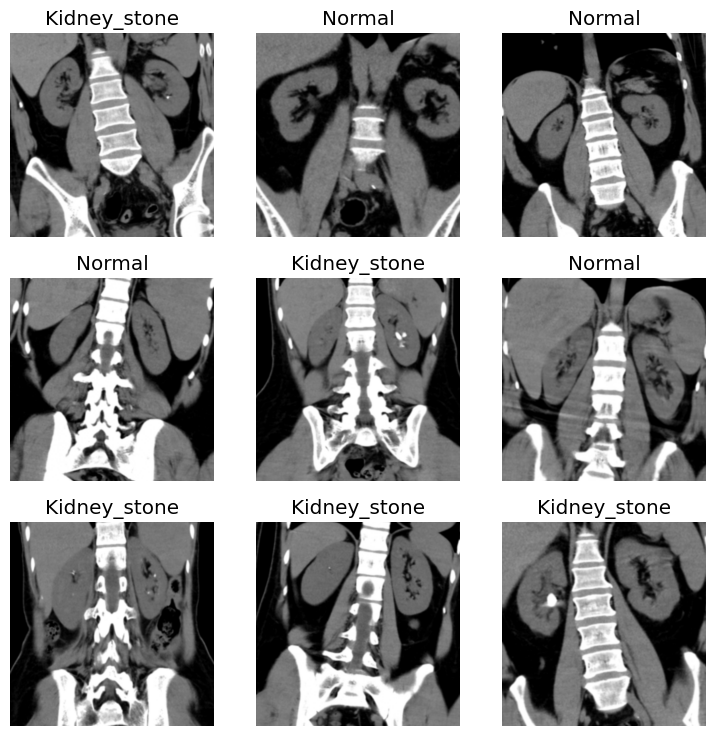

In [ ]:
dls.show_batch()

In [ ]:
import torch
from fastai.vision.all import Learner, create_body, create_head, xresnet50
from fastai.vision.all import *
from fastai.vision.all import *
from fastai.vision.all import cnn_learner, resnet34, accuracy

In [ ]:
model = nn.Sequential(create_body(xresnet50(), pretrained=False),create_head(nf=2048, n_out=2))

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
learn.fit_one_cycle(80,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.751537,0.680613,0.610345,01:07
1,0.685690,0.661038,0.644828,01:05
2,0.691273,0.999827,0.627586,01:05
3,0.686953,0.977633,0.624138,01:05
4,0.648640,5.089663,0.403448,01:05
5,0.389852,0.588879,0.782759,01:05
6,0.296050,0.299857,0.893103,01:05
7,0.599224,2.815406,0.413793,01:05
8,0.498725,0.741287,0.593103,01:05
9,0.324356,0.567925,0.727586,01:05


In [ ]:
learn.save(path/'kidney-50')

Path('/content/cropped_images/kidney-50.pth')

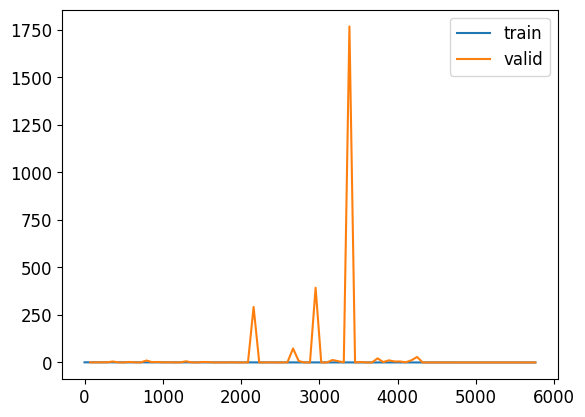

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
all_files= get_image_files(path)

In [ ]:
augs = [Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls_test = dblock.dataloaders(all_files)

In [ ]:
print("Number of examples in testing:", len(dls_test.valid_ds))

Number of examples in testing: 346


In [ ]:
model = nn.Sequential(create_body(xresnet50(), pretrained=False),create_head(nf=2048, n_out=2))

In [ ]:
learn1 = learn1 = Learner(dls_test, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy).load('/content/cropped_images/kidney-50')

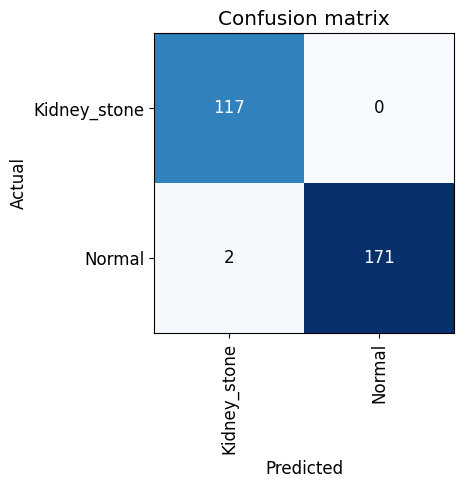

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

Kidney_stone       0.98      1.00      0.99       117
      Normal       1.00      0.99      0.99       173

    accuracy                           0.99       290
   macro avg       0.99      0.99      0.99       290
weighted avg       0.99      0.99      0.99       290



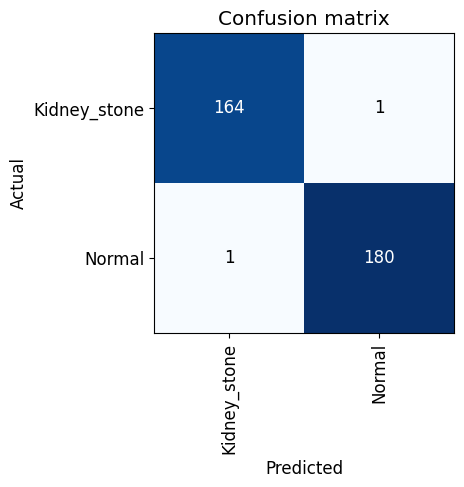

In [ ]:
interp1 = ClassificationInterpretation.from_learner(learn1)
interp1.plot_confusion_matrix()

In [ ]:
interp1.print_classification_report()

              precision    recall  f1-score   support

Kidney_stone       0.99      0.99      0.99       165
      Normal       0.99      0.99      0.99       181

    accuracy                           0.99       346
   macro avg       0.99      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346

